# ТурбоХакатон 
https://codenrock.com/contests/turbohackaton#/tasks
## Задача 1 - Очистка данных для построения моделей оборудования

TODO заисползовать тестовые данные для улучшения итогового решения

### Загрузка данных

In [2]:
# !pip install openpyxl

3

In [3]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

from collections import Counter

In [4]:
# Прописываем все пути и файл
PATH_PROJECT = ""
PATH_DATASET = PATH_PROJECT + "datasets/"

train_source_dataset = PATH_DATASET + "Задача 1. Датасет 1. Тренировочный неразмеченный.xlsx"
train_result_dataset = PATH_DATASET + "Задача 1. Датасет 1. Тренировочный размеченный.xlsx"
test_source_dataset = PATH_DATASET + "Задача 1. Датасет 2. Тестовый неразмеченный.xlsx"
test_result_dataset = PATH_DATASET + "Задача 1. Датасет 2. Тестовый размеченный.xlsx"

In [5]:
# Загружаем данные
train_source_df = pd.read_excel(train_source_dataset)
train_result_df = pd.read_excel(train_result_dataset)
test_source_df = pd.read_excel(test_source_dataset)
test_result_df = pd.read_excel(test_result_dataset)

In [472]:
test_source_df.to_csv("./test_dataset.csv")

In [479]:
test_source_df.columns[1:], test_source_df.set_index("Параметр").columns
test_source_df.columns.get_loc("Параметр")

0

In [473]:
test_source_df.set_index("Параметр")

,х033,х034,х035,х036,х052,х053,х054,х055,х056,х057,...,х082,х083,х084,х085,х086,х087,х088,х089,х090,х091
Параметр,,,,,,,,,,,,,,,,,,,,,
2021-01-01 00:00:00,573.5,573.70000,563.20000,563.5,584.8,585.7,570.9,570.6,563.4,563.3,...,572.4,572.4,568.4,568.2,578.1,580.4,575.7,576.2,585.5,585.9
2021-01-01 00:10:00,573.5,573.70000,563.20000,563.5,584.8,585.7,570.9,570.6,563.4,563.3,...,572.4,572.4,568.4,568.2,578.1,580.4,575.7,576.2,585.5,585.9
2021-01-01 00:20:00,574.2,574.30000,563.10004,564.2,585.8,586.4,570.6,569.9,564.5,564.6,...,572.4,572.9,568.4,568.0,579.0,580.3,575.6,575.5,587.3,586.7
2021-01-01 00:30:00,572.9,573.50000,562.80000,563.4,586.2,586.8,570.6,569.7,565.6,565.3,...,572.5,572.8,568.4,568.3,579.0,580.1,574.6,575.7,586.4,585.7
2021-01-01 00:40:00,573.9,574.40000,563.10004,564.2,585.8,586.1,570.2,569.8,564.6,564.2,...,572.2,572.4,568.1,568.2,578.9,580.1,574.9,575.9,587.3,586.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-29 13:00:00,559.5,560.00000,563.90000,564.5,580.7,581.0,580.2,580.2,576.9,577.3,...,548.4,548.5,544.5,543.9,553.5,553.6,548.8,549.0,554.5,553.9
2021-12-29 13:10:00,559.4,560.10004,564.10004,564.2,580.9,580.7,580.5,580.0,576.7,577.4,...,548.7,549.4,544.4,544.3,553.7,554.4,549.0,549.2,554.4,554.1
2021-12-29 13:20:00,559.7,560.50000,562.60004,564.0,580.4,581.0,580.4,580.5,576.8,577.7,...,548.6,549.0,543.6,544.3,553.9,553.6,548.8,549.1,554.1,554.2


In [56]:
train_source_df.shape, train_result_df.shape, test_source_df.shape, test_result_df.shape

((37339, 45), (36816, 46), (42932, 45), (41160, 46))

In [7]:
train_result_df.head(3)

,Параметр,х001,х002,х005,х006,х007,х008,х009,х010,х011,...,х039,х040,х041,х042,х043,х044,х045,х046,х047,х048
0,2021-03-24 13:50:00,577.64,566.55,590.45,576.19,573.11,571.31,590.91,589.67,579.19,...,577.83,560.46,556.89,555.97,585.74,581.30,561.09,560.34,577.21,577.46
1,2021-03-24 14:00:00,586.00,572.80,599.18,585.74,580.65,578.99,596.22,597.53,585.06,...,591.73,569.11,565.92,564.06,589.19,591.20,569.13,568.94,581.37,585.81
2,2021-03-24 14:10:00,588.59,573.98,600.51,590.21,583.39,582.58,594.09,594.99,586.70,...,597.62,573.98,569.60,567.60,584.83,595.38,572.04,571.79,583.09,588.49


In [335]:
# Объдиняем сырые и обработанные данные с выделением целевого класса mark 0/1
# outliers_value - указываем что является целевой функцией. По идеи мы ищем выбросы, пожтому выбросы = 1, а нормальные данные =0 
outliers_value = 1
train_result_df["mark"] = 1 - outliers_value
test_result_df["mark"] = 1 - outliers_value

train_df = pd.merge(train_source_df, train_result_df[["Параметр" ,"mark"]], on="Параметр", how="left").fillna(outliers_value).rename(columns={"Параметр":"Time"})
train_df["mark"] = train_df["mark"].astype(int)

test_df = pd.merge(test_source_df, test_result_df[["Параметр" ,"mark"]], on="Параметр", how="left").fillna(outliers_value).rename(columns={"Параметр":"Time"})
test_df["mark"] = test_df["mark"].astype(int)
train_result_df.shape, train_source_df.shape, train_df.shape, test_df.shape

In [373]:
#specify the 12 metrics column names to be modelled
time_column = train_df.columns[0]
metrics_columns = train_df.columns[1:-1]
mark_column = train_df.columns[-1]
time_column, metrics_columns, mark_column

('Time',
 Index(['х001', 'х002', 'х005', 'х006', 'х007', 'х008', 'х009', 'х010', 'х011',
        'х012', 'х013', 'х014', 'х015', 'х016', 'х017', 'х018', 'х019', 'х020',
        'х021', 'х022', 'х023', 'х024', 'х025', 'х026', 'х029', 'х030', 'х031',
        'х032', 'х033', 'х034', 'х035', 'х036', 'х037', 'х038', 'х039', 'х040',
        'х041', 'х042', 'х043', 'х044', 'х045', 'х046', 'х047', 'х048'],
       dtype='object'),
 'mark')

In [10]:
# Доля выбросов из общего кол-ва даных
prc_outliers = train_df[train_df[mark_column]==outliers_value].shape[0]/ train_df.shape[0]
print(f"Доля выбросов (степень загрязненности): {round(prc_outliers*100,2)}%")
train_df[mark_column].value_counts()

Доля выбросов (степень загрязненности): 1.4%


0    36816
1      523
Name: mark, dtype: int64

In [459]:
train_df.head(3)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37339 entries, 0 to 37338
Data columns (total 46 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Time    37339 non-null  datetime64[ns]
 1   х001    37339 non-null  float64       
 2   х002    37339 non-null  float64       
 3   х005    37339 non-null  float64       
 4   х006    37339 non-null  float64       
 5   х007    37339 non-null  float64       
 6   х008    37339 non-null  float64       
 7   х009    37339 non-null  float64       
 8   х010    37339 non-null  float64       
 9   х011    37339 non-null  float64       
 10  х012    37339 non-null  float64       
 11  х013    37339 non-null  float64       
 12  х014    37339 non-null  float64       
 13  х015    37339 non-null  float64       
 14  х016    37339 non-null  float64       
 15  х017    37339 non-null  float64       
 16  х018    37339 non-null  float64       
 17  х019    37339 non-null  float64       
 18  х020  

In [106]:
# Проверка точности определения аномалий
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score  
def anomaly_score(df, true_mark, score_metric, outliers_value = 1, show=True):
    # outliers_value - указываем что является целевой функцией. 
    # По идеи мы ищем выбросы, поэтому выбросы = 1, а нормальные данные =0 
    
    true_anomaly = df[df[true_mark] == outliers_value]
    score_anomaly = df[df[score_metric] == outliers_value]
    prc_true_detect = round((df[(df[true_mark] == outliers_value)&(df[score_metric] == outliers_value)].shape[0])/true_anomaly.shape[0]*100,4)
    prc_false_detect_all = round(df[(df[true_mark] == (1-outliers_value))&(df[score_metric] == outliers_value)].shape[0]/df.shape[0]*100,4)
    
    cnt_true_detect = df[(df[true_mark] == outliers_value)&(df[score_metric] == outliers_value)].shape[0]
    cnt_false_detect_all = df[(df[true_mark] == (1-outliers_value))&(df[score_metric] == outliers_value)].shape[0]
    
    if show:
        print(f"Всего аномалий: {true_anomaly.shape[0]}")
        print(f"Найдено аномалий: {score_anomaly.shape[0]}")
        print(f"Сколько из аномалий найдено: {df[(df[true_mark] == outliers_value)&(df[score_metric] == outliers_value)].shape[0]} из {true_anomaly.shape[0]} ({prc_true_detect}%)")
        print(f"Неверно определенные аномалии: {df[(df[true_mark] == (1-outliers_value))&(df[score_metric] == outliers_value)].shape[0]} ({prc_false_detect_all}%)")
        print("-"*10, "metrics", "-"*10)
        print(f"F1 метрика: {round(f1_score(df[true_mark], df[score_metric])*100,4)}%")
        print(f"Полнота Recall: {round(recall_score(df[true_mark], df[score_metric])*100,4)}%")
        print(f"Точность Precision: {round(precision_score(df[true_mark], df[score_metric])*100,4)}%")
        print(f"Accuracy: {round(accuracy_score(df[true_mark], df[score_metric])*100,4)}%")
        # TODO добавить False Positive Rate - чем меньше тем лучше
        # TODO добавить False Negative Rate - чем меньше тем лучше    
    return cnt_true_detect, cnt_false_detect_all, prc_true_detect, prc_false_detect_all
anomaly_score(train_df, mark_column, mark_column)


Всего аномалий: 523
Найдено аномалий: 523
Сколько из аномалий найдено: 523 из 523 (100.0%)
Неверно определенные аномалии: 0 (0.0%)
---------- metrics ----------
F1 метрика: 100.0%
Полнота Recall: 100.0%
Точность Precision: 100.0%
Accuracy: 100.0%


(523, 0, 100.0, 0.0)

## Анализ данных

#### Проверка кол-ва пропусков временных рядах данных 

In [13]:
all_datetimes = pd.Series(pd.period_range(start=train_df["Time"].min(), end=train_df["Time"].max(), freq='10min')).astype("datetime64[ns]").values
train_datetimes = train_df["Time"].values
all_datetimes.shape, train_datetimes.shape, len(set(all_datetimes) - set(train_datetimes))
lost_dt = sorted(list(set(all_datetimes) - set(train_datetimes)))


cnt_seq_dt_lost = Counter()
len_time_sequence = np.timedelta64(0,'m')
for i in range(len(lost_dt)-1):
    time_delta = lost_dt[i+1] - lost_dt[i]
    # если время изменилось больше чем на 10 минут, значит новый период
    if time_delta == np.timedelta64(10,'m'):
        len_time_sequence += np.timedelta64(10,'m') # 10 минут
    else:
        cnt_seq_dt_lost[len_time_sequence] += 1
        len_time_sequence = np.timedelta64(0,'m')
cnt_seq_dt_lost

Counter({numpy.timedelta64(5140,'m'): 1,
         numpy.timedelta64(21720,'m'): 1,
         numpy.timedelta64(3880,'m'): 1,
         numpy.timedelta64(1990,'m'): 1,
         numpy.timedelta64(10,'m'): 3,
         numpy.timedelta64(1610,'m'): 1,
         numpy.timedelta64(2350,'m'): 1,
         numpy.timedelta64(6180,'m'): 1,
         numpy.timedelta64(3140,'m'): 1,
         numpy.timedelta64(1850,'m'): 1,
         numpy.timedelta64(0,'m'): 3,
         numpy.timedelta64(1520,'m'): 1,
         numpy.timedelta64(69260,'m'): 1,
         numpy.timedelta64(40,'m'): 1,
         numpy.timedelta64(490,'m'): 1,
         numpy.timedelta64(1300,'m'): 1,
         numpy.timedelta64(2570,'m'): 1,
         numpy.timedelta64(3600,'m'): 1,
         numpy.timedelta64(200,'m'): 1,
         numpy.timedelta64(810,'m'): 1,
         numpy.timedelta64(5360,'m'): 1,
         numpy.timedelta64(20,'m'): 1,
         numpy.timedelta64(670,'m'): 1,
         numpy.timedelta64(240,'m'): 1,
         numpy.timedelta64(5

### Визуализация данных

In [14]:
group_one = ['х001', 'х005', 'х006', 'х007', 'х009',  'х011',
        'х012', 'х013', 'х014', 'х015', 'х016', 'х018', 'х019', 'х020',
        'х021', 'х022',  'х026', 'х030', 'х031', 'х032', 'х033', 'х034', 
        'х035',  'х037', 'х040','х041', 'х042', 'х043', 'х044', 'х045', 'х046', 'х047', 'х048']
group_two = ['х002',  'х017','х036', 'х038', 'х039']
group_three = ['х008','х010','х023', 'х024', 'х025','х029',]

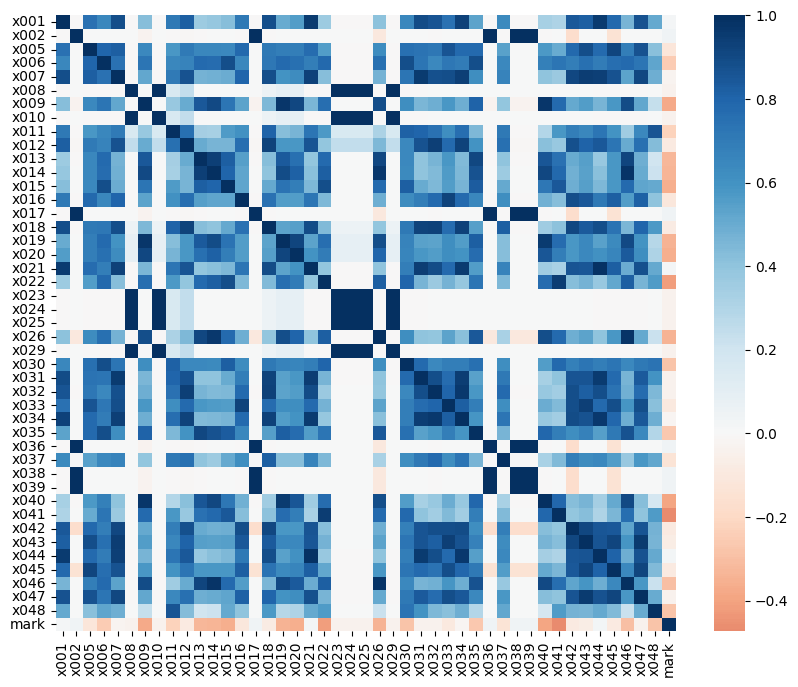

In [15]:
correlation = train_df.drop(columns=["Time"]).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation,
    xticklabels=correlation.columns,
    yticklabels=correlation.columns,
    cmap="RdBu",
    center=0,
)
plt.show()

In [16]:
#### Кол-во последовательностей каждой длинны:

In [17]:
# Рассчитываем кол-во последовательностей каждой длинны:
cnt_seq = Counter()
sequence_mark = train_df[mark_column].values
len_sequence = 0
for i in range(len(sequence_mark)-1):
    if sequence_mark[i] == 1:
        if len_sequence > 0:
            len_sequence += 1
        else:
            len_sequence = 1
    if sequence_mark[i] == 0:
        if len_sequence > 0:
            cnt_seq[len_sequence] += 1
            len_sequence = 0 

cnt_seq.most_common()
# Counter({2: 16, 1: 183, 29: 1, 4: 4, 3: 4, 5: 2, 43: 1, 62: 1, 117: 1, 19: 1})
# первое значение это длина последовательности, а второе это какое кол-во раз встречалась в данных. 
# Так например аномалия только в одной строке встречалась 183 раз, а последовательно в 117 строк встретилась 
# только 1 раз, а последовательность в 5 строки встретилась 2 раза

[(1, 183),
 (2, 16),
 (4, 4),
 (3, 4),
 (5, 2),
 (29, 1),
 (43, 1),
 (62, 1),
 (117, 1),
 (19, 1)]

<!-- [(1, 183), (2, 14), (4, 1), (3, 5), (5, 2), (29, 1), (43, 1),                    (19, 1)] -->
<!-- [(1, 183), (2, 16), (4, 4), (3, 4), (5, 2), (29, 1), (43, 1), (62, 1), (117, 1), (19, 1)] -->

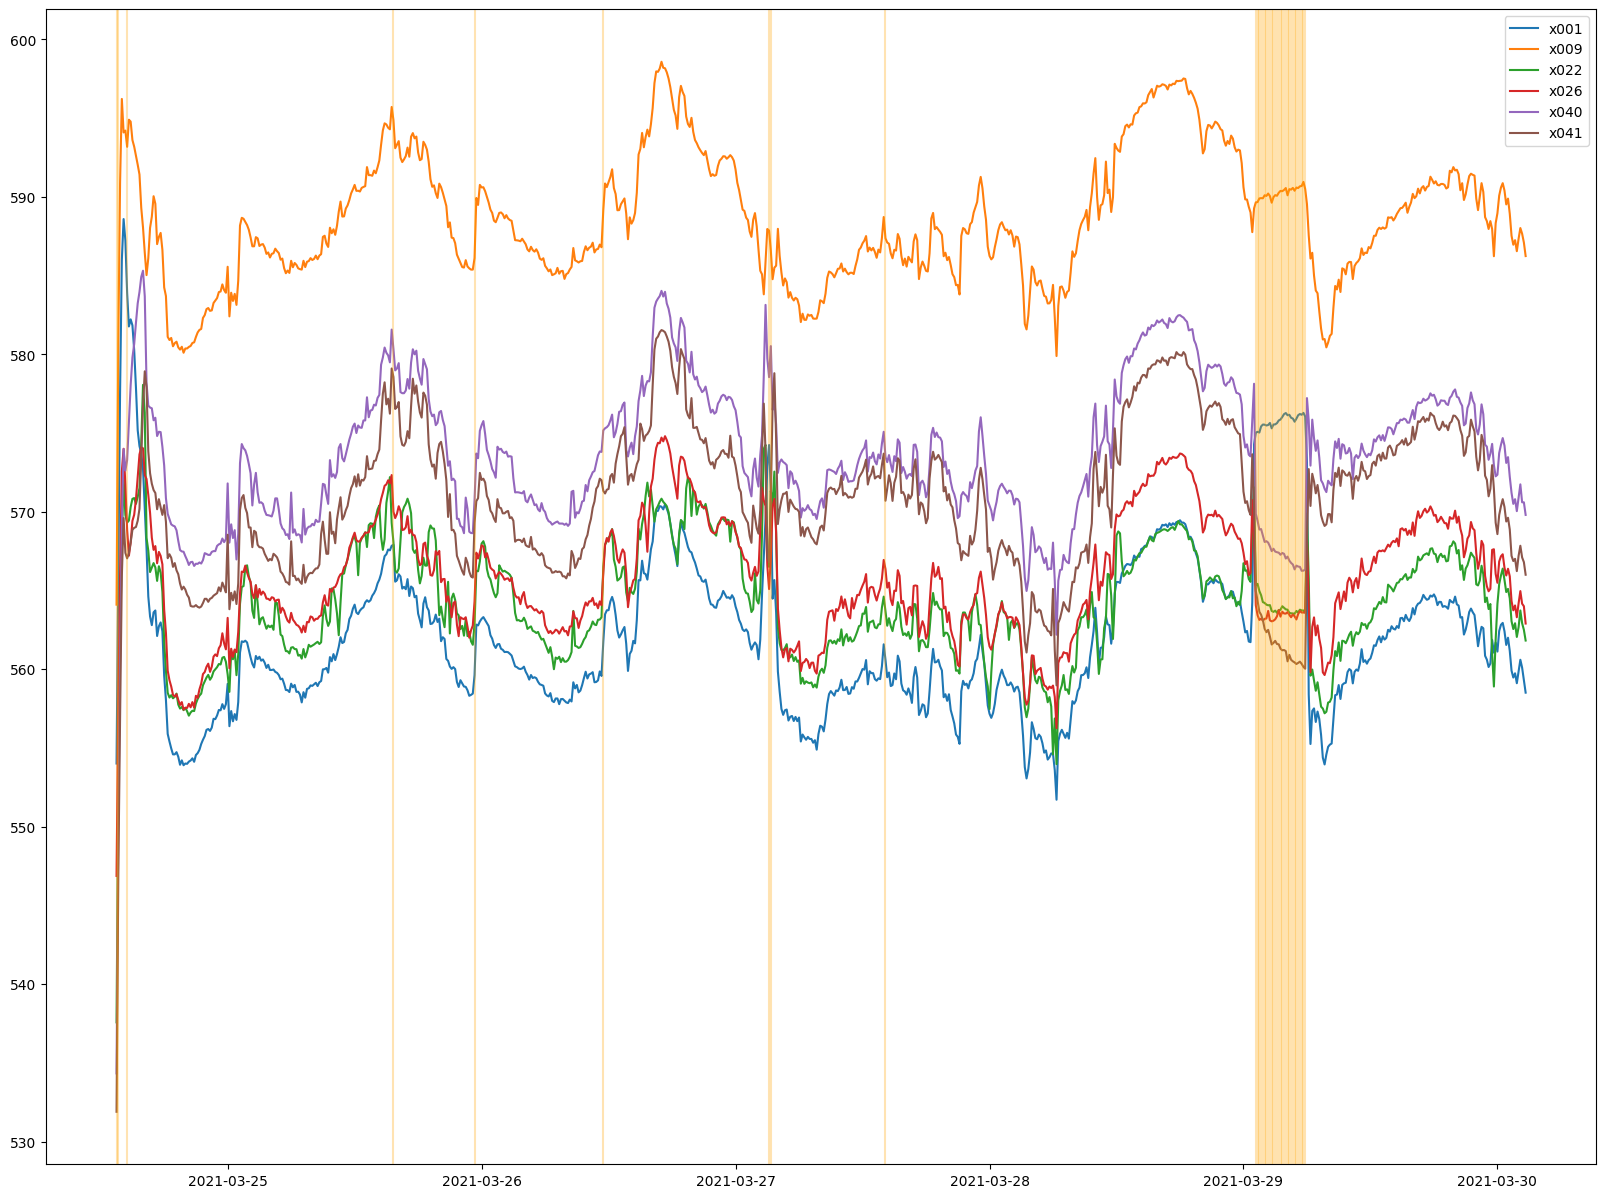

In [18]:
plot_train_df = train_df.iloc[:800].sort_values(by=["Time"])
get_features = ["х001", "х009", "х022", "х026" ,"х040" ,"х041"]
# get_features = group_one + group_two + group_three
# get_features = group_one

plt.figure(figsize=(20,15))
plot_objects = plt.plot(plot_train_df[time_column], plot_train_df[get_features])
# отобразить выросы
for time in plot_train_df[plot_train_df[mark_column]==1][time_column].values:
    plt.axvline(time, color="orange", alpha=0.3)
plt.legend(iter(plot_objects), get_features)
plt.show()

In [19]:
train_df.describe()

,х001,х002,х005,х006,х007,х008,х009,х010,х011,х012,...,х040,х041,х042,х043,х044,х045,х046,х047,х048,mark
count,37339.000000,3.733900e+04,37339.000000,37339.000000,37339.000000,3.733900e+04,37339.000000,3.733900e+04,37339.000000,37339.000000,...,37339.000000,37339.000000,37339.000000,37339.000000,37339.000000,37339.000000,37339.000000,37339.000000,37339.000000,37339.000000
mean,565.717935,1.446599e+06,570.420289,566.746404,569.363318,-8.516564e+26,590.047591,-8.864726e+26,586.713183,588.201857,...,579.831585,576.450864,575.370771,569.940178,563.022028,560.338137,567.112203,569.626793,568.019572,0.014007
std,10.833925,2.794209e+08,21.410874,33.704076,24.795158,1.645681e+29,28.716682,1.712958e+29,16.857839,12.202977,...,30.231616,35.068822,14.514976,18.905974,17.643585,18.074966,24.558174,14.306213,27.598577,0.117520
min,546.090000,4.370000e+01,33.235000,0.578700,219.510000,-3.180000e+31,78.200000,-3.310000e+31,80.491000,7.390400,...,1.771600,0.572920,87.924000,100.460000,537.780000,69.260000,78.300000,217.640000,-30.000000,0.000000
25%,557.110000,5.613100e+02,556.470000,548.100000,548.380000,5.785400e+02,581.010000,5.775000e+02,576.840000,579.480000,...,573.380000,570.060000,564.710000,555.760000,547.810000,548.000000,558.640000,559.370000,557.780000,0.000000
50%,561.070000,5.654300e+02,562.840000,555.390000,555.450000,5.841200e+02,587.080000,5.842400e+02,582.720000,583.840000,...,577.800000,574.550000,569.070000,561.120000,554.350000,554.100000,563.130000,564.560000,563.690000,0.000000
75%,576.070000,5.781000e+02,587.760000,593.720000,597.485000,5.967350e+02,604.550000,6.043500e+02,600.000000,599.400000,...,590.490000,587.590000,588.790000,588.870000,581.820000,574.870000,578.430000,582.580000,582.480000,0.000000
max,604.030000,5.399335e+10,623.170000,615.880000,615.540000,6.141600e+02,622.580000,6.219800e+02,617.960000,616.880000,...,610.830000,608.920000,610.410000,612.920000,620.500000,606.630000,606.270000,607.010000,610.230000,1.000000


### Анализ выброосов через Изоляционные деревья

In [684]:
# Применим изоляционные деревья
from sklearn.ensemble import IsolationForest

def calc_anomaly_isolation_forest(df, use_columns, contamination=0.1, outliers_value = 1):
    # аргумент contamination - вызывает warning, вроде это проблема в sklearn, надо будет еще разобраться
    i_forest = IsolationForest(n_estimators=100, contamination=contamination, max_samples=df.shape[0], \
                            max_features=len(use_columns), bootstrap=False, n_jobs=-1, random_state=42, verbose=0)
#     i_forest.fit(df[use_columns])
# abs    pred = i_forest.predict(df[use_columns])
    i_forest.fit(df[use_columns].to_numpy())
    pred = i_forest.predict(df[use_columns].to_numpy())
    anomalys = np.where(pred == -1, outliers_value, (1-outliers_value))
    return anomalys


In [463]:
# Базовые настройки IsolationForest contamination=0.1
# аргумент contamination - вызывает warning, вроде это проблема в sklearn, надо будет еще разобраться
train_df['anomaly_iforest'] = calc_anomaly_isolation_forest(train_df, metrics_columns)
anomaly_score(train_df, mark_column, "anomaly_iforest")

Всего аномалий: 523
Найдено аномалий: 3734
Сколько из аномалий найдено: 408 из 523 (78.0115%)
Неверно определенные аномалии: 3326 (8.9076%)
---------- metrics ----------
F1 метрика: 19.1684%
Полнота Recall: 78.0115%
Точность Precision: 10.9266%
Accuracy: 90.7844%


(408, 3326, 78.0115, 8.9076)

In [22]:
# Настроим параметры для изоляционных деревьев
# contamination - степень загрязненности - 0.002%
train_df['anomaly_iforest'] = calc_anomaly_isolation_forest(train_df, metrics_columns, contamination=0.002)
anomaly_score(train_df, mark_column, "anomaly_iforest")

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Всего аномалий: 523
Найдено аномалий: 75
Сколько из аномалий найдено: 75 из 523
Неверно определенные аномалии: 0
---------- metrics ----------
F1 метрика: 25.0836%
Полнота Recall: 14.3403%
Точность Precision: 100.0%
Accuracy: 98.8002%


In [65]:
# Настроим параметры для изоляционных деревьев
# contamination - степень загрязненности - 0.003%
train_df['anomaly_iforest'] = calc_anomaly_isolation_forest(train_df, metrics_columns, contamination=0.003)
anomaly_score(train_df, mark_column, "anomaly_iforest")

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Всего аномалий: 523
Найдено аномалий: 113
Сколько из аномалий найдено: 112 из 523 (21.4149%)
Неверно определенные аномалии: 1 (0.0027%)
---------- metrics ----------
F1 метрика: 35.2201%
Полнота Recall: 21.4149%
Точность Precision: 99.115%
Accuracy: 98.8966%


In [76]:

step = 0.003
contamination=0.003 # - степень загрязненности - 0.003%
# Настроим параметры для изоляционных деревьев
for i in range(30):
    print(i, contamination)
    train_df['anomaly_iforest'] = calc_anomaly_isolation_forest(train_df, metrics_columns, contamination=contamination)
    cnt_true_detect, cnt_false_detect_all, prc_true_detect, prc_false_detect_all = anomaly_score(train_df, mark_column, "anomaly_iforest", show=True)
    print(f"prc_true_detect: {prc_true_detect}%, prc_false_detect_all: {prc_false_detect_all}%")
    contamination += step

0 0.003


C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Всего аномалий: 523
Найдено аномалий: 113
Сколько из аномалий найдено: 112 из 523 (21.4149%)
Неверно определенные аномалии: 1 (0.0027%)
---------- metrics ----------
F1 метрика: 35.2201%
Полнота Recall: 21.4149%
Точность Precision: 99.115%
Accuracy: 98.8966%
prc_true_detect: 21.4149%, prc_false_detect_all: 0.0027%
1 0.006


C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Всего аномалий: 523
Найдено аномалий: 225
Сколько из аномалий найдено: 181 из 523 (34.608%)
Неверно определенные аномалии: 44 (0.1178%)
---------- metrics ----------
F1 метрика: 48.3957%
Полнота Recall: 34.608%
Точность Precision: 80.4444%
Accuracy: 98.9662%
prc_true_detect: 34.608%, prc_false_detect_all: 0.1178%
2 0.009000000000000001


C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Всего аномалий: 523
Найдено аномалий: 337
Сколько из аномалий найдено: 209 из 523 (39.9618%)
Неверно определенные аномалии: 128 (0.3428%)
---------- metrics ----------
F1 метрика: 48.6047%
Полнота Recall: 39.9618%
Точность Precision: 62.0178%
Accuracy: 98.8163%
prc_true_detect: 39.9618%, prc_false_detect_all: 0.3428%
3 0.012


C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Всего аномалий: 523
Найдено аномалий: 449
Сколько из аномалий найдено: 245 из 523 (46.8451%)
Неверно определенные аномалии: 204 (0.5463%)
---------- metrics ----------
F1 метрика: 50.4115%
Полнота Recall: 46.8451%
Точность Precision: 54.5657%
Accuracy: 98.7091%
prc_true_detect: 46.8451%, prc_false_detect_all: 0.5463%
4 0.015


C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Всего аномалий: 523
Найдено аномалий: 561
Сколько из аномалий найдено: 274 из 523 (52.3901%)
Неверно определенные аномалии: 287 (0.7686%)
---------- metrics ----------
F1 метрика: 50.5535%
Полнота Recall: 52.3901%
Точность Precision: 48.8414%
Accuracy: 98.5645%
prc_true_detect: 52.3901%, prc_false_detect_all: 0.7686%
5 0.018


C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Всего аномалий: 523
Найдено аномалий: 673
Сколько из аномалий найдено: 281 из 523 (53.7285%)
Неверно определенные аномалии: 392 (1.0498%)
---------- metrics ----------
F1 метрика: 46.99%
Полнота Recall: 53.7285%
Точность Precision: 41.7533%
Accuracy: 98.302%
prc_true_detect: 53.7285%, prc_false_detect_all: 1.0498%
6 0.020999999999999998


C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Всего аномалий: 523
Найдено аномалий: 785
Сколько из аномалий найдено: 288 из 523 (55.0669%)
Неверно определенные аномалии: 497 (1.331%)
---------- metrics ----------
F1 метрика: 44.0367%
Полнота Recall: 55.0669%
Точность Precision: 36.6879%
Accuracy: 98.0396%
prc_true_detect: 55.0669%, prc_false_detect_all: 1.331%
7 0.023999999999999997


C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Всего аномалий: 523
Найдено аномалий: 897
Сколько из аномалий найдено: 292 из 523 (55.8317%)
Неверно определенные аномалии: 605 (1.6203%)
---------- metrics ----------
F1 метрика: 41.1268%
Полнота Recall: 55.8317%
Точность Precision: 32.553%
Accuracy: 97.7611%
prc_true_detect: 55.8317%, prc_false_detect_all: 1.6203%
8 0.026999999999999996


C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Всего аномалий: 523
Найдено аномалий: 1009
Сколько из аномалий найдено: 298 из 523 (56.979%)
Неверно определенные аномалии: 711 (1.9042%)
---------- metrics ----------
F1 метрика: 38.9034%
Полнота Recall: 56.979%
Точность Precision: 29.5342%
Accuracy: 97.4932%
prc_true_detect: 56.979%, prc_false_detect_all: 1.9042%
9 0.029999999999999995


C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Всего аномалий: 523
Найдено аномалий: 1121
Сколько из аномалий найдено: 307 из 523 (58.6998%)
Неверно определенные аномалии: 814 (2.18%)
---------- metrics ----------
F1 метрика: 37.3479%
Полнота Recall: 58.6998%
Точность Precision: 27.3863%
Accuracy: 97.2415%
prc_true_detect: 58.6998%, prc_false_detect_all: 2.18%
10 0.032999999999999995


C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Всего аномалий: 523
Найдено аномалий: 1233
Сколько из аномалий найдено: 311 из 523 (59.4646%)
Неверно определенные аномалии: 922 (2.4693%)
---------- metrics ----------
F1 метрика: 35.4214%
Полнота Recall: 59.4646%
Точность Precision: 25.223%
Accuracy: 96.963%
prc_true_detect: 59.4646%, prc_false_detect_all: 2.4693%
11 0.036


C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Всего аномалий: 523
Найдено аномалий: 1345
Сколько из аномалий найдено: 317 из 523 (60.6119%)
Неверно определенные аномалии: 1028 (2.7532%)
---------- metrics ----------
F1 метрика: 33.94%
Полнота Recall: 60.6119%
Точность Precision: 23.5688%
Accuracy: 96.6951%
prc_true_detect: 60.6119%, prc_false_detect_all: 2.7532%
12 0.039


C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Всего аномалий: 523
Найдено аномалий: 1457
Сколько из аномалий найдено: 321 из 523 (61.3767%)
Неверно определенные аномалии: 1136 (3.0424%)
---------- metrics ----------
F1 метрика: 32.4242%
Полнота Recall: 61.3767%
Точность Precision: 22.0316%
Accuracy: 96.4166%
prc_true_detect: 61.3767%, prc_false_detect_all: 3.0424%
13 0.042


C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


KeyboardInterrupt: 

In [24]:
# Настроим параметры для изоляционных деревьев
# contamination - степень загрязненности, в нашем случае равна 0,014 (prc_outliers)
train_df['anomaly_iforest'] = calc_anomaly_isolation_forest(train_df, metrics_columns, contamination=prc_outliers)
anomaly_score(train_df, mark_column, "anomaly_iforest")

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Всего аномалий: 523
Найдено аномалий: 523
Сколько из аномалий найдено: 268 из 523
Неверно определенные аномалии: 255
---------- metrics ----------
F1 метрика: 51.2428%
Полнота Recall: 51.2428%
Точность Precision: 51.2428%
Accuracy: 98.6341%


###### Подитог
После настрйоки параметров изоляционных деревьев итоговые значения сильно изменились.
contamination - это уровень загрязнения данных, т.е. по сути указывает сколько мусорных данных надо найти. Укзывается в процентах от общего числа данных.
max_samples— количество случайных выборок, которые будут выбраны из исходного набора данных для создания деревьев изоляции.

Как видно:
- В случае указания contamination очень маленьким, например 0.001% (что равняется 38 записям), то все они действительно являются выбросами (Precision = 100%) и эти строки можно смело выбрасывать из датасета, однако общее кол-во найденных
реальной доли маленькая (Recall = 7% = 38/523). 
- В случае указания уровня загрязнения который у нас в данных prc_outliers (0.014%) то будет найдео именно нужное нам кол-во выборосов 523, но точность уже 50%, т.е. изоляционные деревья только половину выбросов определили верно, другие вероятные выбросы на самом деле являются хорошими данными
- Для contamination = 0.003% 1 хорошоая запись ошибочно приписывается к выбросу

Попробуем выделить важные признаки и еще раз проверить на изоляционных деревьях, как измениться результат

##### Выделяем важные признаки

In [25]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators = 100 , criterion = 'entropy',random_state = 0)
rf_model.fit(train_df[metrics_columns],train_df[mark_column]);
feature_importances = pd.Series(rf_model.feature_importances_, index=metrics_columns)
rf_model.feature_importances_

array([0.01649637, 0.01955287, 0.03095502, 0.01612728, 0.01666539,
       0.01084788, 0.0207775 , 0.01177866, 0.0303796 , 0.03651682,
       0.03461845, 0.01013291, 0.01993275, 0.0123706 , 0.02193599,
       0.01796421, 0.02178585, 0.05158364, 0.01415549, 0.03523104,
       0.01481673, 0.01347551, 0.01744684, 0.0194973 , 0.03175703,
       0.02364094, 0.01888425, 0.01168995, 0.00964853, 0.01145834,
       0.01519468, 0.0208389 , 0.05919726, 0.01291938, 0.01714641,
       0.04088488, 0.06881711, 0.02206486, 0.01673883, 0.01303965,
       0.01653464, 0.02266252, 0.01152304, 0.04031408])

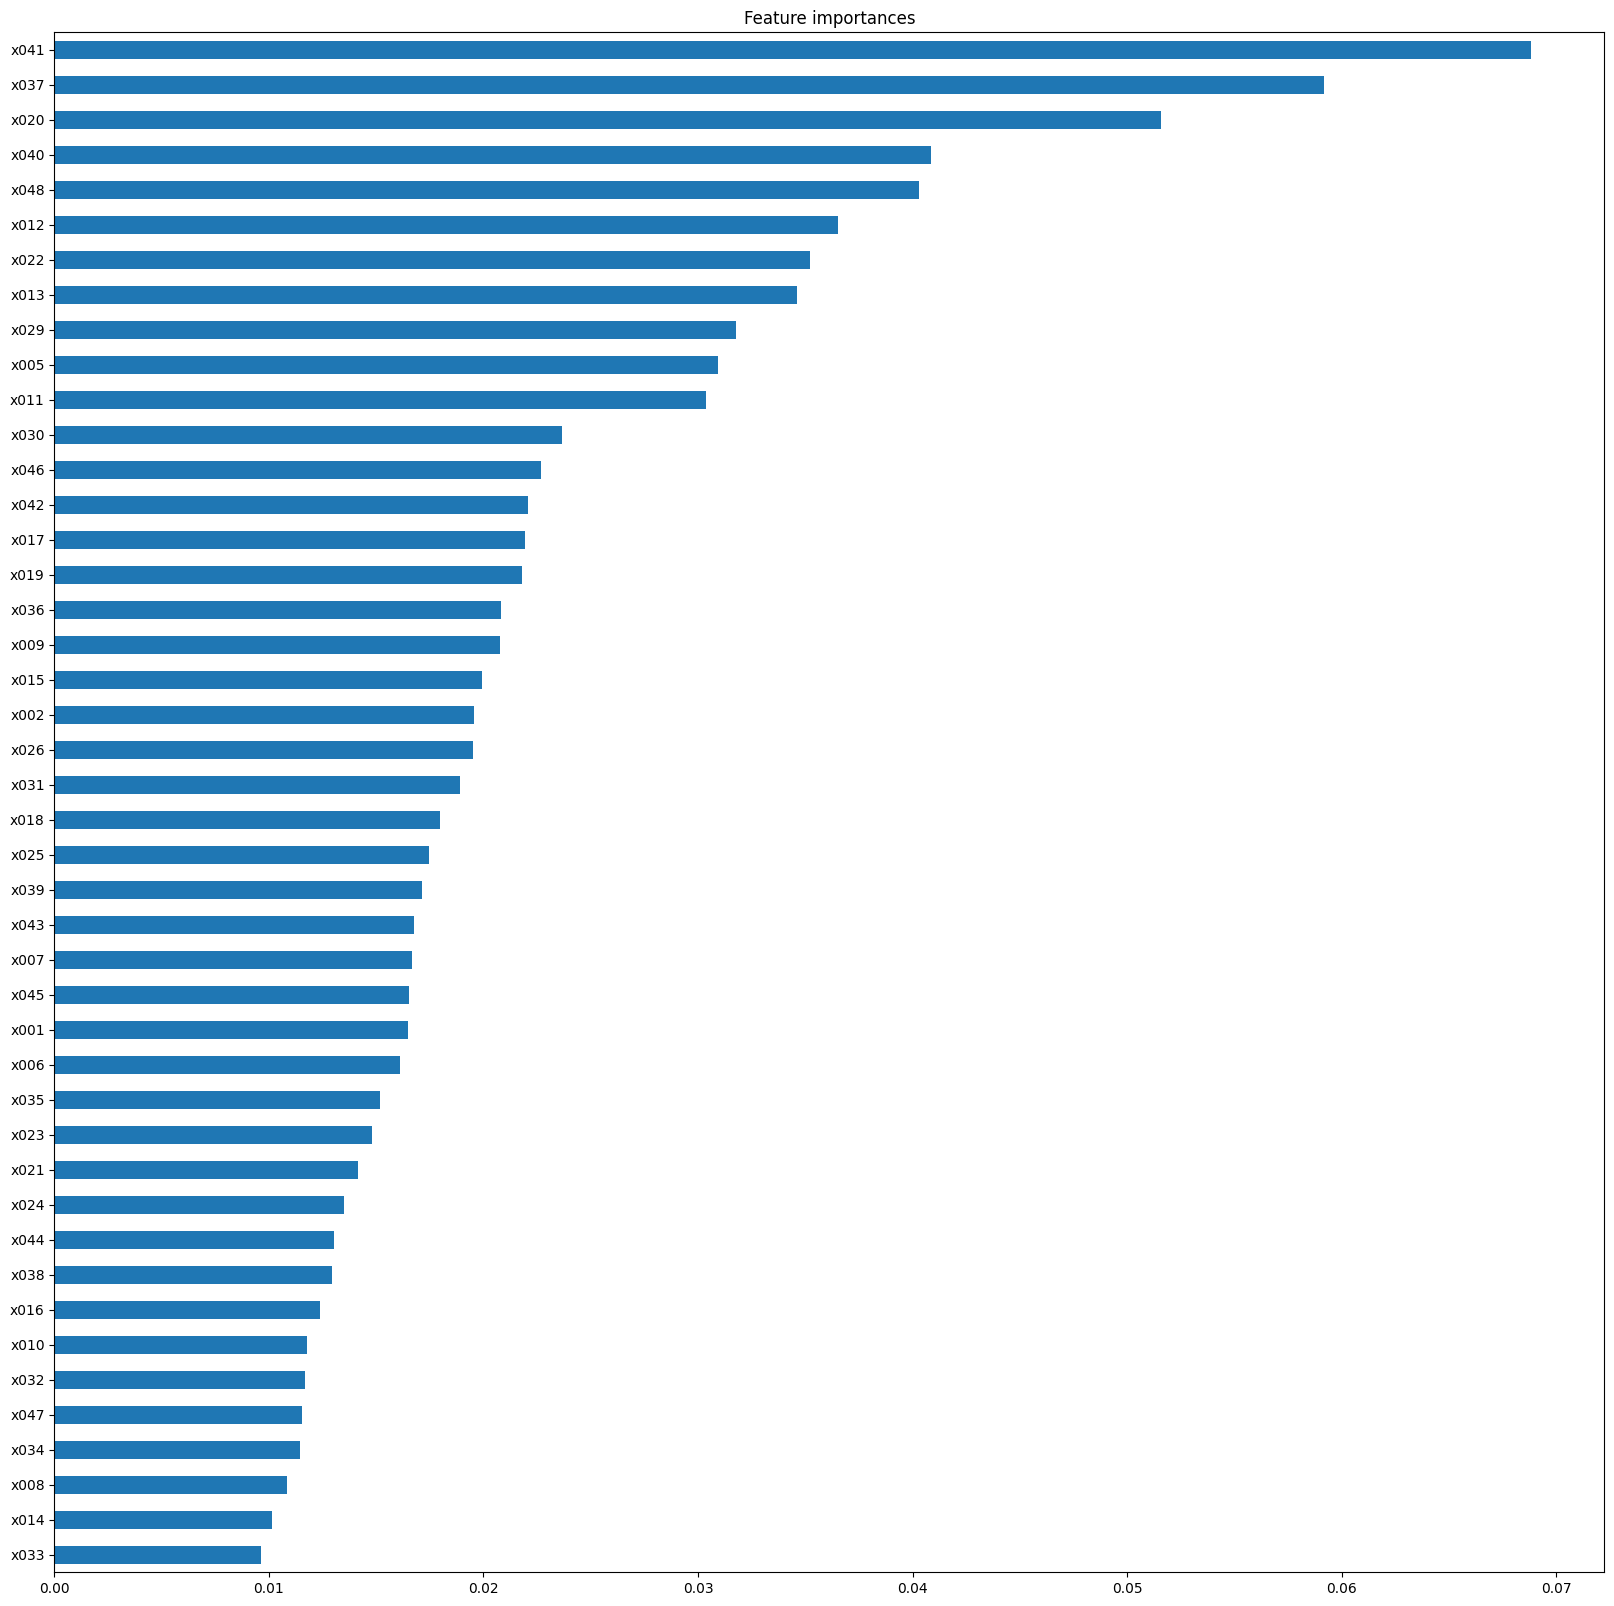

In [26]:
feature_importances.nsmallest(train_df.shape[0]).plot(kind='barh', title="Feature importances", figsize=(20,20))
plt.show()

In [27]:
# Выбираем первые N признаков, которые наиболее влияют
count_important_features = 12
feature_importances_columns = list(feature_importances.nlargest(train_df.shape[0]).iloc[:count_important_features].index)

##### Повтроно применим изоляционные деревья 
но уже для наиболее важных фичей

In [28]:
# Настроим параметры для изоляционных деревьев
# contamination = 0.003, а в качестве рассамтриваемых колонок используются важные признаки
train_df['anomaly_iforest'] = calc_anomaly_isolation_forest(train_df, feature_importances_columns, contamination=0.003)
anomaly_score(train_df, mark_column, "anomaly_iforest")

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Всего аномалий: 523
Найдено аномалий: 113
Сколько из аномалий найдено: 113 из 523
Неверно определенные аномалии: 0
---------- metrics ----------
F1 метрика: 35.5346%
Полнота Recall: 21.6061%
Точность Precision: 100.0%
Accuracy: 98.902%


In [29]:
# Настроим параметры для изоляционных деревьев
# contamination = 0.003, а в качестве рассамтриваемых колонок используются важные признаки
train_df['anomaly_iforest'] = calc_anomaly_isolation_forest(train_df, feature_importances_columns, contamination=0.004)
anomaly_score(train_df, mark_column, "anomaly_iforest")

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Всего аномалий: 523
Найдено аномалий: 150
Сколько из аномалий найдено: 150 из 523
Неверно определенные аномалии: 0
---------- metrics ----------
F1 метрика: 44.5765%
Полнота Recall: 28.6807%
Точность Precision: 100.0%
Accuracy: 99.001%


In [30]:
# Настроим параметры для изоляционных деревьев
# contamination = 0.003, а в качестве рассамтриваемых колонок используются важные признаки
train_df['anomaly_iforest'] = calc_anomaly_isolation_forest(train_df, feature_importances_columns, contamination=0.005)
anomaly_score(train_df, mark_column, "anomaly_iforest")

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Всего аномалий: 523
Найдено аномалий: 187
Сколько из аномалий найдено: 175 из 523
Неверно определенные аномалии: 12
---------- metrics ----------
F1 метрика: 49.2958%
Полнота Recall: 33.4608%
Точность Precision: 93.5829%
Accuracy: 99.0359%


In [31]:
# Настроим параметры для изоляционных деревьев
# contamination - степень загрязненности, в нашем случае равна 0,014 (prc_outliers)
train_df['anomaly_iforest'] = calc_anomaly_isolation_forest(train_df, metrics_columns, contamination=prc_outliers)
anomaly_score(train_df, mark_column, "anomaly_iforest")

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Всего аномалий: 523
Найдено аномалий: 523
Сколько из аномалий найдено: 268 из 523
Неверно определенные аномалии: 255
---------- metrics ----------
F1 метрика: 51.2428%
Полнота Recall: 51.2428%
Точность Precision: 51.2428%
Accuracy: 98.6341%


In [32]:
# Настроим параметры для изоляционных деревьев
# contamination - степень загрязненности, в нашем случае равна 0,014 (prc_outliers)
train_df['anomaly_iforest'] = calc_anomaly_isolation_forest(train_df, feature_importances_columns, contamination=prc_outliers)
anomaly_score(train_df, mark_column, "anomaly_iforest")

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Всего аномалий: 523
Найдено аномалий: 523
Сколько из аномалий найдено: 291 из 523
Неверно определенные аномалии: 232
---------- metrics ----------
F1 метрика: 55.6405%
Полнота Recall: 55.6405%
Точность Precision: 55.6405%
Accuracy: 98.7573%


In [33]:
# Настроим параметры для изоляционных деревьев
# contamination - степень загрязненности, в нашем случае равна 0,014 (prc_outliers)
train_df['anomaly_iforest'] = calc_anomaly_isolation_forest(train_df[group_three], group_three, contamination=0.0006)
anomaly_score(train_df, mark_column, "anomaly_iforest")

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Всего аномалий: 523
Найдено аномалий: 23
Сколько из аномалий найдено: 23 из 523
Неверно определенные аномалии: 0
---------- metrics ----------
F1 метрика: 8.4249%
Полнота Recall: 4.3977%
Точность Precision: 100.0%
Accuracy: 98.6609%


In [34]:
# Настроим параметры для изоляционных деревьев
# contamination - степень загрязненности, в нашем случае равна 0,014 (prc_outliers)
train_df['anomaly_iforest'] = calc_anomaly_isolation_forest(train_df[group_two], group_two, contamination=0.0012)
anomaly_score(train_df, mark_column, "anomaly_iforest")

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Всего аномалий: 523
Найдено аномалий: 45
Сколько из аномалий найдено: 45 из 523
Неверно определенные аномалии: 0
---------- metrics ----------
F1 метрика: 15.8451%
Полнота Recall: 8.6042%
Точность Precision: 100.0%
Accuracy: 98.7198%


In [35]:
# Настроим параметры для изоляционных деревьев
# contamination - степень загрязненности, в нашем случае равна 0,014 (prc_outliers)
train_df['anomaly_iforest'] = calc_anomaly_isolation_forest(train_df[group_one], group_one, contamination=0.0028)
anomaly_score(train_df, mark_column, "anomaly_iforest")

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Всего аномалий: 523
Найдено аномалий: 105
Сколько из аномалий найдено: 105 из 523
Неверно определенные аномалии: 0
---------- metrics ----------
F1 метрика: 33.4395%
Полнота Recall: 20.0765%
Точность Precision: 100.0%
Accuracy: 98.8805%


###### Подитог обсуждения 22.10.2022
Выбор наиболее важных фичей улучшило результат, но незначительно 

Необходимо изменить сам подход:
Если IsolationForest отнести к среднему по мощности инструменту, то проверку на выход значений за перделы 3 сигм к простому, то  алгоритм будет примерно следующий:
1. Применяем простые инструменты: Чистим данные от 100% выбросов это те которые либо слишком простые либо слишком сложные (убиираем явно крайнии случаи)
2. Применяем средние инструменты (например IsolationForest): убираем невалидные данные уже внутри допустимого диапозона
    2.1. IsolationForest
    2.2. COPOD
3. Мержим коллективное решение всех методов. Если несколько методов указывают что данные аномальные значит доверяем такому решению, если только 1 метод говорит что данные аномальные то игнорируем
4. Анализируем каждый параметр через обучение 
5. Анализ временных рядов
    5.1. Регресиия (LSTM) - 
    5.2. Проверить на разрывы. Разделить данные на сессии ()
    5.3. ARIMA авторегрессионые модели
    5.4. тройное сглаживание
    5.5. бустинг
6. Графически оценить 

ограничение: 30 минут


Проверка что аномалия 
Выделять непрервыные участки (сброс) 
Корреляция параметров
Росхождение двух сильнокоррелируемх признаков

Например если есть два датчика температуры и обычно они показывают одинаковые даннные, а когда начали показывать разные данные то это может быть аномалией

Алгоритм Сравниее двух временных рядов (алгроитм ДТрасноформации Временой Шкалы) - посмтреть на матрицу в ДТВ вмемсто обычной корреляции

Выделять области данных, где аномалии. Предположение, что эксперты выделяют области

трансформеры

Учитывать что строки опредлеены несколькими анализаторами, если уже два анализатора сказали что тут аномалия значит верим
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(k for k, v in outlier_indices.items() if v > n)
    return multiple_outliers


## Первичная обработка
Применение "простых" и надежных инстурментов по очистике, чтобы исклюичть явные выбросы, т.е. значения близкие к 0 или к очень большому значению

### Определение выбросов через среднеквадратическое отклонение

In [104]:
# Отбрасываем те значения которые превышают (стандартное отклоенние)*4 - 4 вместо 3 выбраны, т.к. необходимо 100% быть увереным в аномалии
def search_anomalies(data, cnt_std = 2.5):
    data_std = np.std(data)
    data_mean = np.mean(data)
    # data_mean = np.median(data)
    limit_3_std = data_std * cnt_std
    lower_limit  = data_mean - limit_3_std
    upper_limit = data_mean + limit_3_std
    find_outliers = data.where((data < lower_limit) | (data>upper_limit) )
    return find_outliers

# Проходим по каждому признаку и определяем аномалии
anomaly_rows = []
for column in metrics_columns:
    anomaly = search_anomalies(train_df[column])
    anomaly_rows.extend(list(anomaly.dropna().index))
# Удаляем дубликаты строк
anomaly_rows = list(set(anomaly_rows))

train_df['anomaly_std'] = 0
train_df.loc[anomaly_rows, ['anomaly_std']] = 1
anomaly_score(train_df, mark_column, "anomaly_std")

# Создаем train_df_step2 в котором уже выкинутые найденные 182 аномалии (Всего осталось аномалий 523->341)
train_df_step2 = train_df.drop(anomaly_rows)
train_df_step2[mark_column].value_counts()

Всего аномалий: 523
Найдено аномалий: 622
Сколько из аномалий найдено: 241 из 523 (46.0803%)
Неверно определенные аномалии: 381 (1.0204%)
---------- metrics ----------
F1 метрика: 42.0961%
Полнота Recall: 46.0803%
Точность Precision: 38.746%
Accuracy: 98.2244%


0    36435
1      282
Name: mark, dtype: int64

In [37]:
# Еще раз проверяем отклонение среднеквадратическое отклонение, но с менее жесткими 
# требованиями, в связи с чем выявлется большое кол-во хороших данных, для их исключения проверятся
# кол-во попаданий каждого объекта как аномальный по разным признакам. Если отклонение наблюдается
# по двум и более признакам, то считаем, что объект аномальный

# Проходим по каждому признаку и определяем аномалии
anomaly_list = []
for column in metrics_columns:
    anomaly_series = search_anomalies(train_df_step2[column], cnt_std=3.5)
    anomaly_list.extend(list(anomaly_series.dropna().index))

anomaly_rows = list(k for k, v in Counter(anomaly_list).items() if v > 2)

train_df_step2['anomaly_std_multirow'] = 0
train_df_step2.loc[anomaly_rows, ['anomaly_std_multirow']] = 1
anomaly_score(train_df_step2, mark_column, "anomaly_std_multirow")

# обновляем train_df_step2 в котором выкинутые дополнитеьно найденные аномалии 
train_df_step2 = train_df_step2.drop(anomaly_rows)
train_df_step2[mark_column].value_counts()

Всего аномалий: 341
Найдено аномалий: 3
Сколько из аномалий найдено: 3 из 341
Неверно определенные аномалии: 0
---------- metrics ----------
F1 метрика: 1.7442%
Полнота Recall: 0.8798%
Точность Precision: 100.0%
Accuracy: 99.0903%


0    36816
1      338
Name: mark, dtype: int64

### Определение выбросов через квартили

In [38]:
# Отбрасываем те значения которые 
# 1. рассчитывем квартили (% распределение данных)
# 2. по каждому признаку определяем данные которые выходят 
# за границы квартильного размаха (по умолчанию полтора размаха)
# 3. Определяем те объекты, которые выходят за границы квартильного 
# размаха по нескольким признакам (по умполчанию 2).
# Другими словами: если у рассматриваемого объекта по двум и более признакам
# выявлен выход за полуторный квартильный размах, то этот объект считаем аномалией
def detect_outliers(df, features, n_features=2, k_outlier=1.5):
    outlier_indices = []
    # проходим по каждому признаку
    for col in features:
        # Определяем Q1 - 1ый квартиль (25% данных будут меньше Q1, а 75% больше чем значение Q1)
        Q1 = np.percentile(df[col], 25)
        # Определяем Q3 - 3ый квартиль (25% данных будут больше Q3, а 75% меньше чем значение Q3)
        Q3 = np.percentile(df[col], 75)
        # IQR межквартильный размах, описывает 50% данных
        IQR = Q3 - Q1
        # Определяем порог для засчитывания значения как аномального
        # по умолчанию 1.5*межквартильного размаха!
        outlier_step = k_outlier * IQR
        # Определяем аномальные данные, которые выходят за порог outlier_step
        outlier_list_col = df[(df[col] < Q1 - outlier_step) |     (df[col] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)
    # Определяем те объекты, которые выходят за границы квартильного размаха по нескольким признакам (по умполчанию 2).
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(k for k, v in outlier_indices.items() if v > n_features)
    return multiple_outliers

In [39]:
# Рассчитываем квартильное отклонение данных
outliers_of_quartile = detect_outliers(train_df_step2, metrics_columns, n_features=2, k_outlier=1.2)

train_df_step2['anomaly_quartile'] = 0
# train_df_step2.loc[outliers_of_quartile]
train_df_step2.loc[outliers_of_quartile, ['anomaly_quartile']] = 1
anomaly_score(train_df_step2, mark_column, "anomaly_quartile")

# обновляем train_df_step2 в котором выкинутые дополнитеьно найденные аномалии
train_df_step2 = train_df_step2.drop(outliers_of_quartile)
train_df_step2[mark_column].value_counts()

Всего аномалий: 338
Найдено аномалий: 7
Сколько из аномалий найдено: 7 из 338
Неверно определенные аномалии: 0
---------- metrics ----------
F1 метрика: 4.058%
Полнота Recall: 2.071%
Точность Precision: 100.0%
Accuracy: 99.1091%


0    36816
1      331
Name: mark, dtype: int64

#### Определение выбросов через резкий скачок значений

In [40]:
# добавляем информацию о соблюдении последовательности
# т.е. если временная последовательность соблюдена то 1
# если был скачок по времени (перерыв в данных), то 0

current_time = train_df_step2["Time"]
next_time = train_df_step2["Time"].shift(-1)
# delta_time_series = pd.concat(next_time-current_time,pd.Series([np.timedelta64(10,'m')]) )
delta_time_series = next_time-current_time
delta_time_series = pd.DataFrame({"DeltaTime": delta_time_series})
delta_time_series.iloc[-1] = np.timedelta64(10,'m')
train_df_step2["DeltaTime"] = delta_time_series["DeltaTime"]
train_df_step2.shape

(37147, 51)

In [470]:
# добавляем информацию о соблюдении последовательности
# т.е. если временная последовательность соблюдена то 1
# если был скачок по времени (перерыв в данных), то 0

current_time = train_df_step2["Time"]
next_time = train_df_step2["Time"].shift(-1)
# delta_time_series = pd.concat(next_time-current_time,pd.Series([np.timedelta64(10,'m')]) )
delta_time_series = next_time-current_time
delta_time_series = pd.DataFrame({"DeltaTime": delta_time_series})
delta_time_series.iloc[-1] = np.timedelta64(10,'m')
# train_df_step2.loc[:,["DeltaTime"]] = delta_time_series.loc[:,"DeltaTime"]]
train_df_step2["DeltaTime"] = delta_time_series["DeltaTime"]
train_df_step2.shape

(37034, 50)

In [41]:
# mask_delta_values = np.where((train_df_step2["DeltaTime"] != np.timedelta64(10,'m')), True, False) 
# train_df_step2[mask_delta_values]

In [42]:
# Определение выбросов через резкий скачок значений при условии, 
# что по дате небыло скачка, т.е. разница между данными 10 минут
def find_gap_anomaly(df, std_porog=1.5, n_counter=3):
    find_anomaly_rows = []
    for column in metrics_columns:
        current_values = df[column]
        next_values = df[column].shift(-1)
        std_values = df[column].std()
        delta_values = next_values - current_values
        delta_values.iloc[-1] = 0
        df["TempCalc"] = pd.DataFrame(delta_values)
        mask_delta_values = np.where((abs(df["TempCalc"]) > std_values*std_porog)&(df["DeltaTime"] == np.timedelta64(10,'m')), True, False ) 
        find_anomaly_rows.extend(df[mask_delta_values].index)
    outlier_rows = list(k for k, v in Counter(find_anomaly_rows).items() if v >= n_counter)
    return outlier_rows

In [43]:
# Ищем аномалии у которых был резкий скачок (gap > std*1.5) и такие объекты были замечены более чем по 3м признакам
gap_outlier_rows = find_gap_anomaly(train_df_step2, std_porog=1.5, n_counter=3)
train_df_step2['anomaly_gap'] = 0
train_df_step2.loc[gap_outlier_rows, ['anomaly_gap']] = 1
anomaly_score(train_df_step2, mark_column, "anomaly_gap")

# обновляем train_df_step2 в котором выкинутые дополнитеьно найденные аномалии
train_df_step2 = train_df_step2.drop(gap_outlier_rows)
train_df_step2[mark_column].value_counts()

Всего аномалий: 331
Найдено аномалий: 5
Сколько из аномалий найдено: 5 из 331
Неверно определенные аномалии: 0
---------- metrics ----------
F1 метрика: 2.9762%
Полнота Recall: 1.5106%
Точность Precision: 100.0%
Accuracy: 99.1224%


0    36816
1      326
Name: mark, dtype: int64

In [44]:
# Ищем аномалии у которых был резкий скачок (gap > std*2) хотя бы у одного признака
gap_outlier_rows = find_gap_anomaly(train_df_step2, std_porog=2, n_counter=1)
train_df_step2['anomaly_gap'] = 0
train_df_step2.loc[gap_outlier_rows, ['anomaly_gap']] = 1
anomaly_score(train_df_step2, mark_column, "anomaly_gap")

# обновляем train_df_step2 в котором выкинутые дополнитеьно найденные аномалии
train_df_step2 = train_df_step2.drop(gap_outlier_rows)
train_df_step2[mark_column].value_counts()

Всего аномалий: 326
Найдено аномалий: 1
Сколько из аномалий найдено: 1 из 326
Неверно определенные аномалии: 0
---------- metrics ----------
F1 метрика: 0.6116%
Полнота Recall: 0.3067%
Точность Precision: 100.0%
Accuracy: 99.125%


0    36816
1      325
Name: mark, dtype: int64

In [45]:
# Рассчитываем кол-во последовательностей каждой длинны:
cnt_seq = Counter()
sequence_mark = train_df_step2[mark_column].values
len_sequence = 0
for i in range(len(sequence_mark)-1):
    if sequence_mark[i] == 1:
        if len_sequence > 0:
            len_sequence += 1
        else:
            len_sequence = 1
    if sequence_mark[i] == 0:
        if len_sequence > 0:
            cnt_seq[len_sequence] += 1
            len_sequence = 0 
cnt_seq.most_common()
# Counter({2: 16, 1: 183, 29: 1, 4: 4, 3: 4, 5: 2, 43: 1, 62: 1, 117: 1, 19: 1})
# первое значение это длина последовательности, а второе это какое кол-во раз встречалась в данных. 
# Так например аномалия только в одной строке встречалась 183 раз, а последовательно в 117 строк встретилась 
# только 1 раз, а последовательность в 5 строки встретилась 2 раза

[(1, 179), (2, 13), (3, 5), (5, 2), (29, 1), (43, 1), (4, 1), (19, 1)]

In [46]:
# Рассчитываем кол-во последовательностей каждой длинны:
cnt_seq = Counter()
sequence_mark = train_df_step2[mark_column].values
len_sequence = 0
for i in range(len(sequence_mark)-1):
    if sequence_mark[i] == 1:
        if len_sequence > 0:
            len_sequence += 1
        else:
            len_sequence = 1
    if sequence_mark[i] == 0:
        if len_sequence > 0:
            cnt_seq[len_sequence] += 1
            len_sequence = 0 
cnt_seq.most_common()
# Counter({2: 16, 1: 183, 29: 1, 4: 4, 3: 4, 5: 2, 43: 1, 62: 1, 117: 1, 19: 1})
# первое значение это длина последовательности, а второе это какое кол-во раз встречалась в данных. 
# Так например аномалия только в одной строке встречалась 183 раз, а последовательно в 117 строк встретилась 
# только 1 раз, а последовательность в 5 строки встретилась 2 раза

[(1, 179), (2, 13), (3, 5), (5, 2), (29, 1), (43, 1), (4, 1), (19, 1)]

## Повторный анализ данных после первичной очистки

Признак: х001


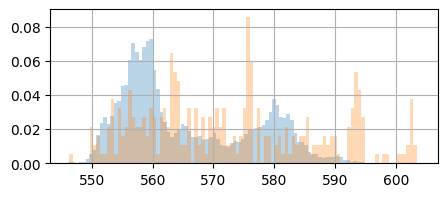

Признак: х002


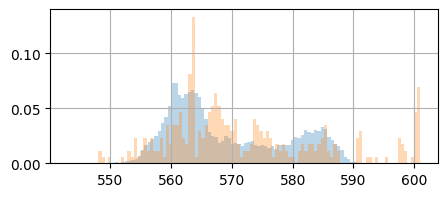

Признак: х005


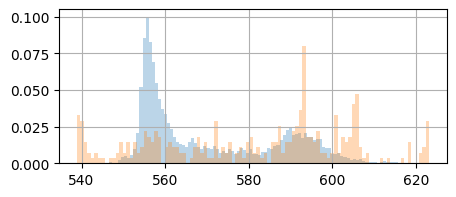

Признак: х006


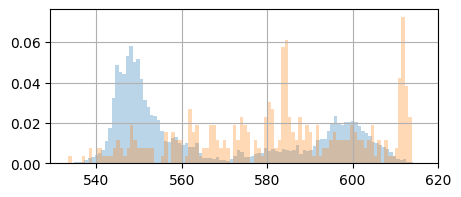

Признак: х007


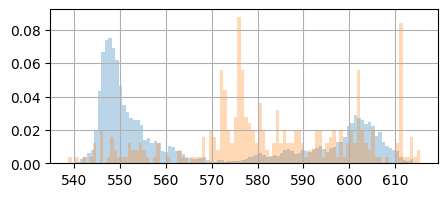

Признак: х008


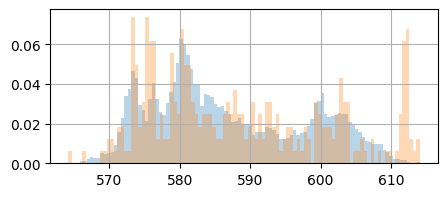

Признак: х009


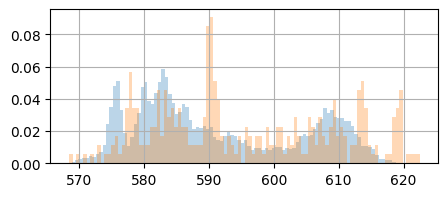

Признак: х010


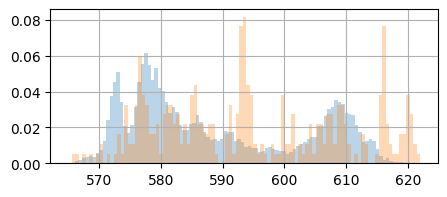

Признак: х011


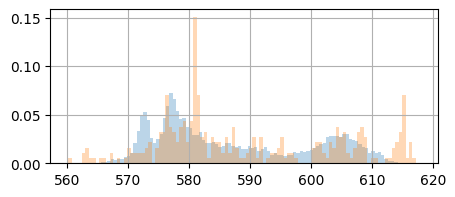

Признак: х012


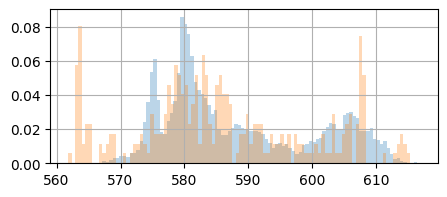

Признак: х013


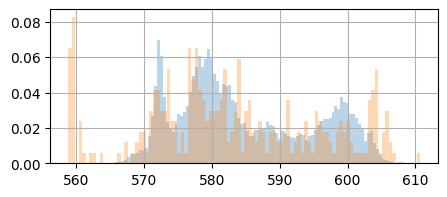

Признак: х014


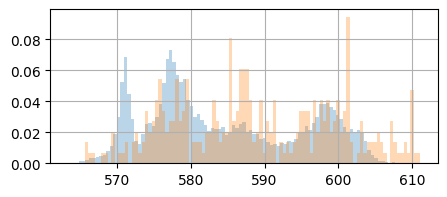

Признак: х015


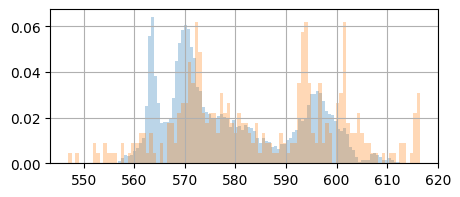

Признак: х016


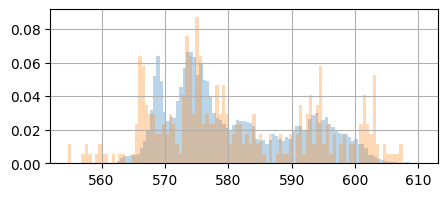

Признак: х017


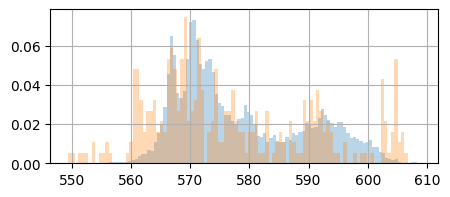

Признак: х018


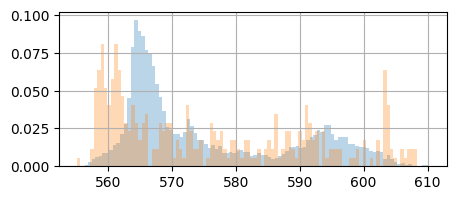

Признак: х019


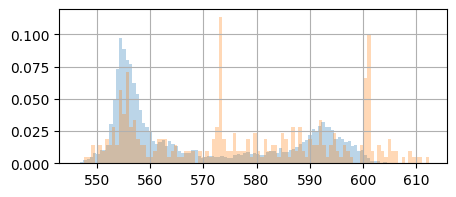

Признак: х020


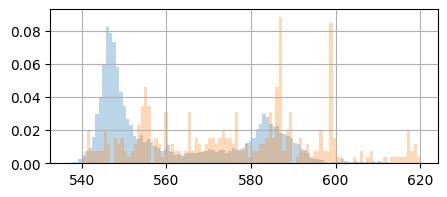

Признак: х021


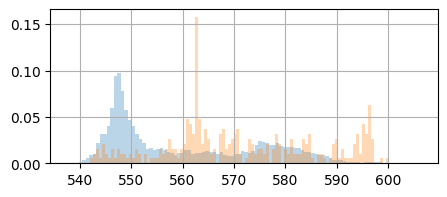

Признак: х022


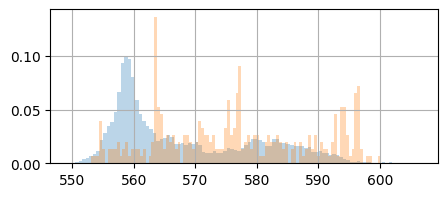

Признак: х023


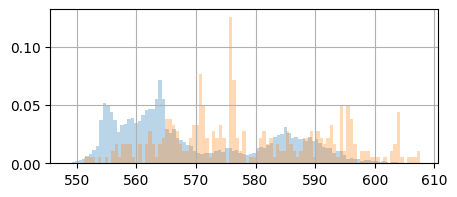

Признак: х024


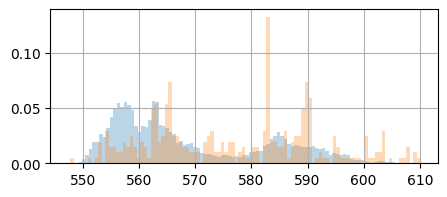

Признак: х025


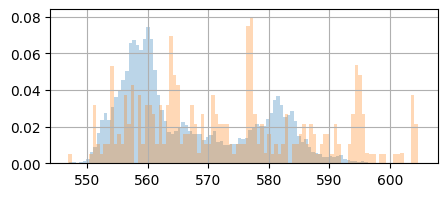

Признак: х026


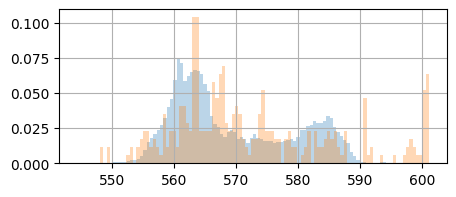

Признак: х029


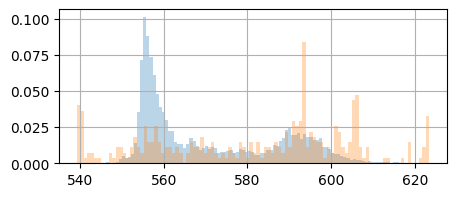

Признак: х030


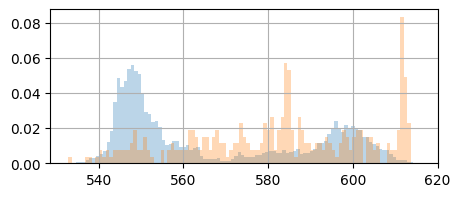

Признак: х031


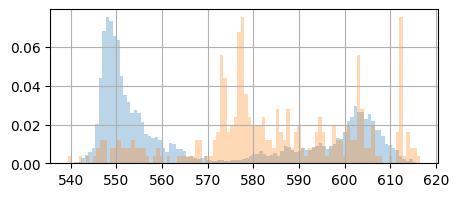

Признак: х032


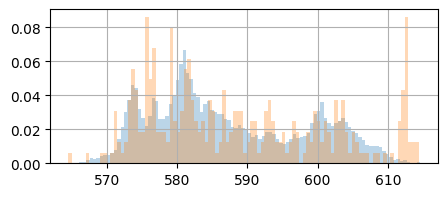

Признак: х033


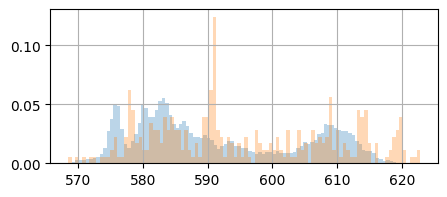

Признак: х034


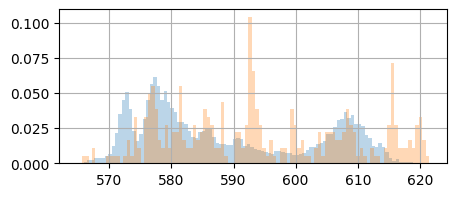

Признак: х035


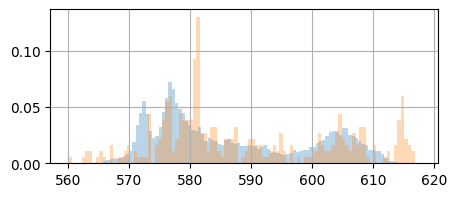

Признак: х036


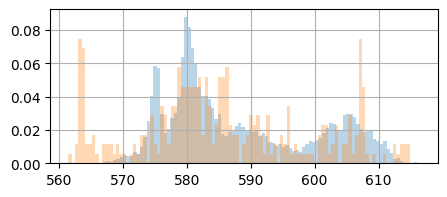

Признак: х037


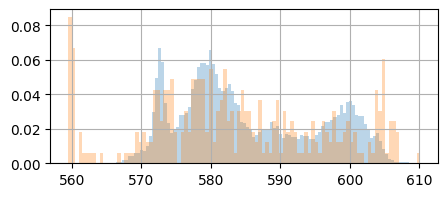

Признак: х038


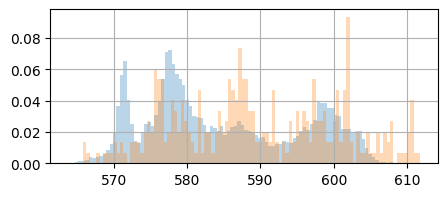

Признак: х039


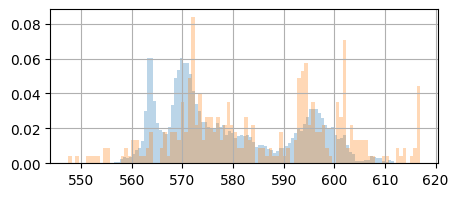

Признак: х040


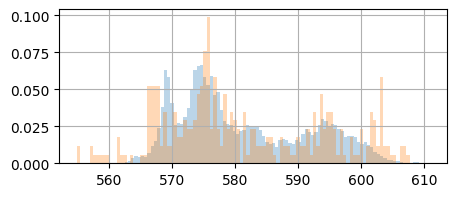

Признак: х041


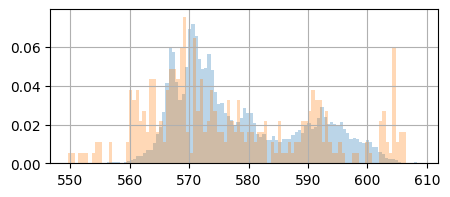

Признак: х042


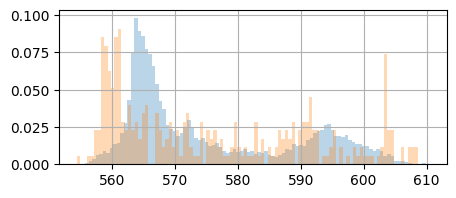

Признак: х043


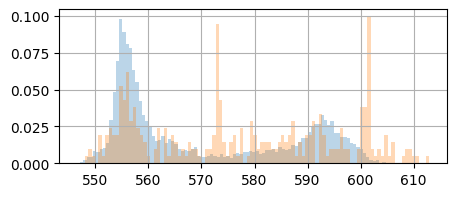

Признак: х044


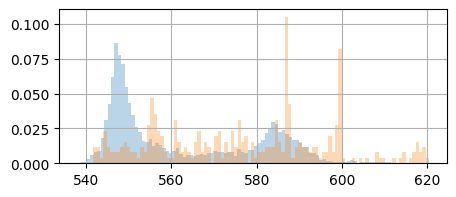

Признак: х045


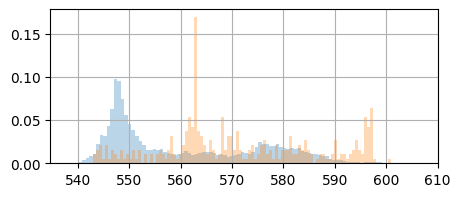

Признак: х046


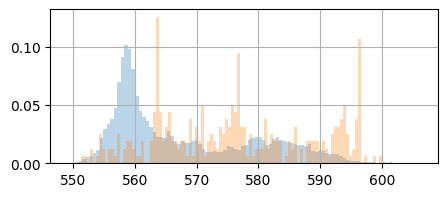

Признак: х047


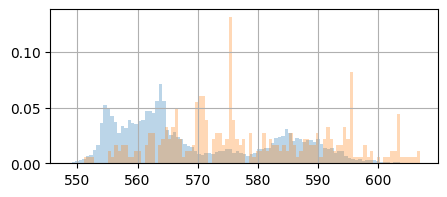

Признак: х048


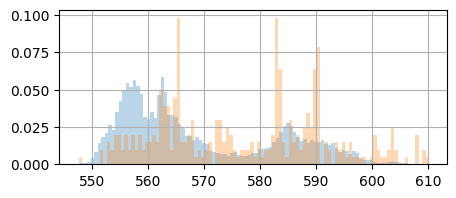

In [47]:
# Распределение значений Признаков относительно целевого параметра (аномалия или нет)
for column in metrics_columns:
    print(f"Признак: {column}")
    train_df_step2.groupby(mark_column)[column].hist(bins=100, alpha=0.3, density=True, figsize=(5,2))
    plt.show()

## Вторичная обработка
Применение "средних" инстурментов по очистике. С критическими настройками, такими чтобы выбрасывать только 100% аномалии

In [48]:
# https://machinelearningmastery.com/model-based-outlier-detection-and-removal-in-python/
# https://scikit-learn.org/stable/modules/outlier_detection.html
# https://towardsdatascience.com/data-cleaning-in-python-the-ultimate-guide-2020-c63b88bf0a0d

#### Изоляционные деревья

In [92]:
# Настроим параметры для изоляционных деревьев
# contamination = 0.003, а в качестве рассамтриваемых колонок используются все признаки
train_df_step2['anomaly_iforest'] = calc_anomaly_isolation_forest(train_df_step2, metrics_columns, contamination=0.0001)
anomaly_score(train_df_step2, mark_column, "anomaly_iforest")

anomaly_rows = train_df_step2[train_df_step2['anomaly_iforest']==1].index
# # обновляем train_df_step3
train_df_step3 = train_df_step2.drop(anomaly_rows)
train_df_step3[mark_column].value_counts()

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Всего аномалий: 325
Найдено аномалий: 38
Сколько из аномалий найдено: 25 из 325 (7.6923%)
Неверно определенные аномалии: 13 (0.035%)
---------- metrics ----------
F1 метрика: 13.7741%
Полнота Recall: 7.6923%
Точность Precision: 65.7895%
Accuracy: 99.1573%


0    36803
1      300
Name: mark, dtype: int64

## Глубокая обработка 
#### Анализируем каждый параметр через обучение 



Опорные вектора
https://medium.com/grabngoinfo/one-class-svm-for-anomaly-detection-6c97fdd6d8af

In [50]:
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(n_neighbors=2)
clf.fit_predict(train_df_step3[metrics_columns])
train_df_step3["anomaly_neighbors"] = clf.negative_outlier_factor_
# array([ -0.9821...,  -1.0370..., -73.3697...,  -0.9821...])

In [51]:
train_df_step3[train_df_step3["anomaly_neighbors"] > -0.8]

,Time,х001,х002,х005,х006,х007,х008,х009,х010,х011,...,х048,mark,anomaly_iforest,anomaly_std,anomaly_std_multirow,anomaly_quartile,DeltaTime,TempCalc,anomaly_gap,anomaly_neighbors
1472,2021-04-07 08:40:00,564.91,569.07,573.78,579.43,585.04,584.04,591.53,590.21,585.66,...,568.85,0,0,0,0,0,0 days 00:10:00,0.57,0,-0.786871
9336,2021-06-30 17:30:00,586.64,585.46,606.38,613.80,615.13,613.96,620.92,620.52,617.75,...,599.83,0,0,0,0,0,0 days 00:10:00,0.34,0,-0.798073


In [52]:
# https://medium.com/grabngoinfo/one-class-svm-for-anomaly-detection-6c97fdd6d8af
from sklearn.svm import OneClassSVM 
# Обучаем модель машины опорных векторов (SVM) одного класса 
# one_class_svm = OneClassSVM(nu=0.01, kernel = 'rbf', gamma = 'auto').fit(X_train)
# Идея заключается в том, что если значение выбивается из доверительного интервала предсказания, значение считается аномальным. Для предсказания временного ряда используются такие алгоритмы, как тройное сглаживание, S(ARIMA), бустинг и т.д.


In [53]:
train_df_step3.head(3)

,Time,х001,х002,х005,х006,х007,х008,х009,х010,х011,...,х048,mark,anomaly_iforest,anomaly_std,anomaly_std_multirow,anomaly_quartile,DeltaTime,TempCalc,anomaly_gap,anomaly_neighbors
2,2021-03-24 13:50:00,577.64,566.55,590.45,576.19,573.11,571.31,590.91,589.67,579.19,...,577.46,0,0,0,0,0,0 days 00:10:00,8.35,0,-1.798085
3,2021-03-24 14:00:00,586.00,572.80,599.18,585.74,580.65,578.99,596.22,597.53,585.06,...,585.81,0,0,0,0,0,0 days 00:10:00,2.68,0,-1.134461
4,2021-03-24 14:10:00,588.59,573.98,600.51,590.21,583.39,582.58,594.09,594.99,586.70,...,588.49,0,0,0,0,0,0 days 00:10:00,-2.33,0,-1.025323


In [54]:
# group_one = ['х001', 'х005', 'х006', 'х007', 'х009',  'х011',
#         'х012', 'х013', 'х014', 'х015', 'х016', 'х018', 'х019', 'х020',
#         'х021', 'х022',  'х026', 'х030', 'х031', 'х032', 'х033', 'х034', 
#         'х035',  'х037', 'х040','х041', 'х042', 'х043', 'х044', 'х045', 'х046', 'х047', 'х048']
# group_two = ['х002',  'х017','х036', 'х038', 'х039']
# group_three = ['х008','х010','х023', 'х024', 'х025','х029',]

In [692]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# LinearRegression

def calc_regression(x_train, x_test, y_train, y_test, std_porog = 3):
    reg = LinearRegression().fit(x_train, y_train)
    y_predict = reg.predict(x_test)
    delta_y_test_predict = y_predict - np.array(y_test)
    max(delta_y_test_predict), min(delta_y_test_predict), np.std(delta_y_test_predict)
    std_delta = np.std(delta_y_test_predict)
    mask_anomaly = np.where(abs(delta_y_test_predict) > std_delta*std_porog, True, False)
    return x_test[mask_anomaly].index


# find_anomaly_regression = []
# for column in metrics_columns:
#     x = train_df_step3[metrics_columns].drop(columns=[column])
#     y = train_df_step3[column]
#     x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.5)
# #     find_outlier_rows = calc_regression(x_train, x_test, y_train, y_test)
# #     find_anomaly_regression.extend(find_outlier_rows)
# #     find_outlier_rows = calc_regression(x_test, x_train, y_test, y_train)
# #     find_anomaly_regression.extend(find_outlier_rows)
#     find_outlier_rows = calc_regression(x, x, y, y)
#     find_anomaly_regression.extend(find_outlier_rows)
    
    

# outlier_rows = list(k for k, v in Counter(find_anomaly_regression).items() if v >= 12)
# train_df_step3.loc[outlier_rows]


In [99]:
outlier_rows = list(k for k, v in Counter(find_anomaly_regression).items() if v >= 12)
train_df_step3['anomaly_dl'] = 0
train_df_step3.loc[outlier_rows,['anomaly_dl']] = 1
train_df_step3['anomaly_dl'].value_counts()
anomaly_score(train_df_step3, mark_column, "anomaly_dl")

Всего аномалий: 300
Найдено аномалий: 628
Сколько из аномалий найдено: 113 из 300 (37.6667%)
Неверно определенные аномалии: 515 (1.388%)
---------- metrics ----------
F1 метрика: 24.3534%
Полнота Recall: 37.6667%
Точность Precision: 17.9936%
Accuracy: 98.108%


(37.6667, 1.388)

In [91]:
outlier_rows = list(k for k, v in Counter(find_anomaly_regression).items() if v >= 12)
train_df_step3['anomaly_dl'] = 0
train_df_step3.loc[outlier_rows,['anomaly_dl']] = 1
train_df_step3['anomaly_dl'].value_counts()
anomaly_score(train_df_step3, mark_column, "anomaly_dl")

Всего аномалий: 321
Найдено аномалий: 238
Сколько из аномалий найдено: 81 из 321 (25.2336%)
Неверно определенные аномалии: 157 (0.4228%)
---------- metrics ----------
F1 метрика: 28.9803%
Полнота Recall: 25.2336%
Точность Precision: 34.0336%
Accuracy: 98.931%


(25.2336, 0.4228)

In [88]:
outlier_rows

[4048, 7499, 14225, 21873, 28421, 14132, 14222]

## Поиск аномалий через временные ряды

### Дополнительные анализ данных 
#### Проверка кол-ва пропусков временных рядахданных 

In [96]:
all_datetimes = pd.Series(pd.period_range(start=train_df["Time"].min(), end=train_df["Time"].max(), freq='10min')).astype("datetime64[ns]").values
train_datetimes = train_df["Time"].values
all_datetimes.shape, train_datetimes.shape, len(set(all_datetimes) - set(train_datetimes))
lost_dt = sorted(list(set(all_datetimes) - set(train_datetimes)))


cnt_seq_dt_lost = Counter()
len_time_sequence = np.timedelta64(0,'m')
for i in range(len(lost_dt)-1):
    time_delta = lost_dt[i+1] - lost_dt[i]
    # если время изменилось больше чем на 10 минут, значит новый период
    if time_delta == np.timedelta64(10,'m'):
        len_time_sequence += np.timedelta64(10,'m') # 10 минут
    else:
        cnt_seq_dt_lost[len_time_sequence] += 1
        len_time_sequence = np.timedelta64(0,'m')
cnt_seq_dt_lost


Counter({numpy.timedelta64(5140,'m'): 1,
         numpy.timedelta64(21720,'m'): 1,
         numpy.timedelta64(3880,'m'): 1,
         numpy.timedelta64(1990,'m'): 1,
         numpy.timedelta64(10,'m'): 3,
         numpy.timedelta64(1610,'m'): 1,
         numpy.timedelta64(2350,'m'): 1,
         numpy.timedelta64(6180,'m'): 1,
         numpy.timedelta64(3140,'m'): 1,
         numpy.timedelta64(1850,'m'): 1,
         numpy.timedelta64(0,'m'): 3,
         numpy.timedelta64(1520,'m'): 1,
         numpy.timedelta64(69260,'m'): 1,
         numpy.timedelta64(40,'m'): 1,
         numpy.timedelta64(490,'m'): 1,
         numpy.timedelta64(1300,'m'): 1,
         numpy.timedelta64(2570,'m'): 1,
         numpy.timedelta64(3600,'m'): 1,
         numpy.timedelta64(200,'m'): 1,
         numpy.timedelta64(810,'m'): 1,
         numpy.timedelta64(5360,'m'): 1,
         numpy.timedelta64(20,'m'): 1,
         numpy.timedelta64(670,'m'): 1,
         numpy.timedelta64(240,'m'): 1,
         numpy.timedelta64(5

 https://scikit-learn.org/stable/modules/outlier_detection.html







In [58]:
train_source_df.to_csv(PATH_DATASET + "train.csv", sep=",")


In [483]:
backup_source_train_df = train_df.copy()
backup_source_test_df = test_df.copy()

### Код для модуля

In [712]:
train_df = test_df.copy()
metrics_columns = train_df.columns[1:-1]
train_df.shape, metrics_columns

((42932, 46),
 Index(['х033', 'х034', 'х035', 'х036', 'х052', 'х053', 'х054', 'х055', 'х056',
        'х057', 'х058', 'х059', 'х060', 'х061', 'х062', 'х063', 'х064', 'х065',
        'х066', 'х067', 'х068', 'х069', 'х070', 'х071', 'х072', 'х073', 'х074',
        'х075', 'х076', 'х077', 'х078', 'х079', 'х080', 'х081', 'х082', 'х083',
        'х084', 'х085', 'х086', 'х087', 'х088', 'х089', 'х090', 'х091'],
       dtype='object'))

In [713]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# Используем модель регрессии для поиска аномалий LinearRegression
def calc_regression(x_train, x_test, y_train, y_test, std_porog = 3):
    reg = LinearRegression().fit(x_train, y_train)
    y_predict = reg.predict(x_test)
    delta_y_test_predict = y_predict - np.array(y_test)
    max(delta_y_test_predict), min(delta_y_test_predict), np.std(delta_y_test_predict)
    std_delta = np.std(delta_y_test_predict)
    mask_anomaly = np.where(abs(delta_y_test_predict) > std_delta*std_porog, True, False)
    return x_test[mask_anomaly].index


# Отбрасываем те значения которые превышают (стандартное отклоенние)*4 - 4 вместо 3 выбраны, т.к. необходимо 100% быть увереным в аномалии
def search_anomalies(data, cnt_std = 2.5):
    data_std = np.std(data)
    data_mean = np.mean(data)
    # data_mean = np.median(data)
    limit_3_std = data_std * cnt_std
    lower_limit  = data_mean - limit_3_std
    upper_limit = data_mean + limit_3_std
    find_outliers = data.where((data < lower_limit) | (data>upper_limit) )
    return find_outliers

# Отбрасываем те значения которые 
# 1. рассчитывем квартили (% распределение данных)
# 2. по каждому признаку определяем данные которые выходят 
# за границы квартильного размаха (по умолчанию полтора размаха)
# 3. Определяем те объекты, которые выходят за границы квартильного 
# размаха по нескольким признакам (по умполчанию 2).
# Другими словами: если у рассматриваемого объекта по двум и более признакам
# выявлен выход за полуторный квартильный размах, то этот объект считаем аномалией
def detect_outliers(df, features, n_features=2, k_outlier=1.5):
    outlier_indices = []
    # проходим по каждому признаку
    for col in features:
        # Определяем Q1 - 1ый квартиль (25% данных будут меньше Q1, а 75% больше чем значение Q1)
        Q1 = np.percentile(df[col], 25)
        # Определяем Q3 - 3ый квартиль (25% данных будут больше Q3, а 75% меньше чем значение Q3)
        Q3 = np.percentile(df[col], 75)
        # IQR межквартильный размах, описывает 50% данных
        IQR = Q3 - Q1
        # Определяем порог для засчитывания значения как аномального
        # по умолчанию 1.5*межквартильного размаха!
        outlier_step = k_outlier * IQR
        # Определяем аномальные данные, которые выходят за порог outlier_step
        outlier_list_col = df[(df[col] < Q1 - outlier_step) |     (df[col] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)
    # Определяем те объекты, которые выходят за границы квартильного размаха по нескольким признакам (по умполчанию 2).
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(k for k, v in outlier_indices.items() if v > n_features)
    return multiple_outliers

def global_anomaly_score(df_source, df_result, true_mark, outliers_value = 1, show=True):
    # Функция сравнения итогового датасета с изначальным - оценка эффективности
    # outliers_value - указываем что является целевой функцией. 
    # По идеи мы ищем выбросы, поэтому выбросы = 1, а нормальные данные =0 
    print( df_source[df_source[true_mark] == 1].shape )
    print( df_result[df_result[true_mark] == 1].shape )
    all_anomaly = df_source[df_source[true_mark] == 1].shape[0]
    find_anomaly = all_anomaly - df_result[df_result[true_mark] == 1].shape[0]
    all_good = df_source[df_source[true_mark] == 0].shape[0]
    del_good = all_good - df_result[df_result[true_mark] == 0].shape[0]
    print(f"Найдено выбросов: {find_anomaly} из {all_anomaly} ({round(find_anomaly/all_anomaly,4)*100}%)")
    print(f"Удалено хороших: {del_good} из {all_good} ({round(del_good/all_good,4)*100}%)")


# Определение выбросов через резкий скачок значений при условии, 
# что по дате небыло скачка, т.е. разница между данными 10 минут
def find_gap_anomaly(df, metrics_columns, std_porog=1.5, n_counter=3, timeleft=10):
    find_anomaly_rows = []
    for column in metrics_columns:
        current_values = df[column]
        next_values = df[column].shift(-1)
        std_values = df[column].std()
        delta_values = next_values - current_values
        delta_values.iloc[-1] = 0
        df["TempCalc"] = pd.DataFrame(delta_values)
        mask_delta_values = np.where((abs(df["TempCalc"]) > std_values*std_porog)&(df["DeltaTime"] <= np.timedelta64(timeleft,'m')), True, False ) 
        find_anomaly_rows.extend(df[mask_delta_values].index)
    outlier_rows = list(k for k, v in Counter(find_anomaly_rows).items() if v >= n_counter)
    return outlier_rows    

In [714]:
train_df_step1 = train_df.copy()

In [738]:
def main_clear_app(train_df_step1, metrics):

    # добавляем информацию о соблюдении последовательности
    # т.е. если временная последовательность соблюдена то 1
    # если был скачок по времени (перерыв в данных), то 0

    current_time = train_df_step1["Time"]
    next_time = train_df_step1["Time"].shift(-1)
    # delta_time_series = pd.concat(next_time-current_time,pd.Series([np.timedelta64(10,'m')]) )
    delta_time_series = next_time-current_time
    delta_time_series = pd.DataFrame({"DeltaTime": delta_time_series})
    delta_time_series.iloc[-1] = np.timedelta64(10,'m')
    train_df_step1["DeltaTime"] = delta_time_series["DeltaTime"]
    train_df_step1.shape    
    
    print(f"\ntrain_df_step1: {train_df_step1.shape}\n\n")

    

    
    
    
    # Проходим по каждому признаку и определяем аномалии
    anomaly_rows = []
    for column in metrics:
        anomaly = search_anomalies(train_df_step1[column], cnt_std=3)
        anomaly_rows.extend(list(anomaly.dropna().index))
    # Удаляем дубликаты строк
    anomaly_rows = list(set(anomaly_rows))

    train_df_step1['anomaly_std'] = 0
    train_df_step1.loc[anomaly_rows, ['anomaly_std']] = 1
    cnt_true, cnt_false, prc_true, prc_false = anomaly_score(train_df_step1, mark_column, "anomaly_std")
    if cnt_true > 0:
        print(f"good/bad: {cnt_false/cnt_true}")

    # Создаем train_df_step2 в котором уже выкинутые найденные 182 аномалии (Всего осталось аномалий 523->341)
    train_df_step2 = train_df_step1.drop(anomaly_rows)
    train_df_step2[mark_column].value_counts()    
    
    print(f"\ntrain_df_step2_1: {train_df_step2.shape}\n\n")  
  

    # Проходим по каждому признаку и определяем аномалии
    anomaly_rows = []
    for column in metrics:
        anomaly = search_anomalies(train_df_step2[column], cnt_std=2.9)
        anomaly_rows.extend(list(anomaly.dropna().index))
    # Удаляем дубликаты строк
    anomaly_rows = list(set(anomaly_rows))

    train_df_step2['anomaly_std'] = 0
    train_df_step2.loc[anomaly_rows, ['anomaly_std']] = 1
    cnt_true, cnt_false, prc_true, prc_false = anomaly_score(train_df_step2, mark_column, "anomaly_std")
    if cnt_true > 0:
        print(f"good/bad: {cnt_false/cnt_true}")

    # Создаем train_df_step2 в котором уже выкинутые найденные 182 аномалии (Всего осталось аномалий 523->341)
    train_df_step2 = train_df_step2.drop(anomaly_rows)
    train_df_step2[mark_column].value_counts()    

    print(f"\ntrain_df_step2_2: {train_df_step2.shape}\n\n")
    
    # Еще раз проверяем отклонение среднеквадратическое отклонение, но с менее жесткими 
    # требованиями, в связи с чем выявлется большое кол-во хороших данных, для их исключения проверятся
    # кол-во попаданий каждого объекта как аномальный по разным признакам. Если отклонение наблюдается
    # по двум и более признакам, то считаем, что объект аномальный

    # Проходим по каждому признаку и определяем аномалии
    anomaly_list = []
    for column in metrics:
        anomaly_series = search_anomalies(train_df_step2[column], cnt_std=2.5)
        anomaly_list.extend(list(anomaly_series.dropna().index))


    anomaly_rows = list(k for k, v in Counter(anomaly_list).items() if v > 3)


    train_df_step2['anomaly_std_multirow'] = 0
    train_df_step2.loc[anomaly_rows, ['anomaly_std_multirow']] = 1
    cnt_true, cnt_false, prc_true, prc_false = anomaly_score(train_df_step2, mark_column, "anomaly_std_multirow")
    if cnt_true > 0:
        print(f"good/bad: {cnt_false/cnt_true}")

    # обновляем train_df_step2 в котором выкинутые дополнитеьно найденные аномалии 
    train_df_step3 = train_df_step2.drop(anomaly_rows)
    train_df_step3[mark_column].value_counts()    
    
    print(f"\ntrain_df_step3: {train_df_step3.shape}\n\n")
    
    train_df_step4 = train_df_step3.copy()

    # Ищем аномалии у которых был резкий скачок (gap > std*1.5) и такие объекты были замечены более чем по 3м признакам
#     gap_outlier_rows = find_gap_anomaly(train_df_step4, metrics, std_porog=1, n_counter=2)
    gap_outlier_rows = find_gap_anomaly(train_df_step4, metrics, std_porog=2.5, n_counter=4, timeleft=10)
    train_df_step4['anomaly_gap'] = 0
    train_df_step4.loc[gap_outlier_rows, ['anomaly_gap']] = 1
    cnt_true, cnt_false, prc_true, prc_false = anomaly_score(train_df_step4, mark_column, "anomaly_gap")
    if cnt_true > 0:
        print(f"good/bad: {cnt_false/cnt_true}")

    # обновляем train_df_step2 в котором выкинутые дополнитеьно найденные аномалии
    train_df_step5 = train_df_step4.drop(gap_outlier_rows)
    train_df_step5[mark_column].value_counts()

    print(f"\ntrain_df_step5: {train_df_step5.shape}\n\n")

    
    gap_outlier_rows = find_gap_anomaly(train_df_step5, metrics, std_porog=3.5, n_counter=1, timeleft=60)
    train_df_step5['anomaly_gap'] = 0
    train_df_step5.loc[gap_outlier_rows, ['anomaly_gap']] = 1
    cnt_true, cnt_false, prc_true, prc_false = anomaly_score(train_df_step5, mark_column, "anomaly_gap")
    if cnt_true > 0:
        print(f"good/bad: {cnt_false/cnt_true}")

    # обновляем train_df_step2 в котором выкинутые дополнитеьно найденные аномалии
    train_df_step5 = train_df_step5.drop(gap_outlier_rows)
    train_df_step5[mark_column].value_counts()

    print(f"\ntrain_df_step5_2: {train_df_step5.shape}\n\n")
    
    
    gap_outlier_rows = find_gap_anomaly(train_df_step5, metrics, std_porog=4, n_counter=1, timeleft=200)
    train_df_step5['anomaly_gap'] = 0
    train_df_step5.loc[gap_outlier_rows, ['anomaly_gap']] = 1
    cnt_true, cnt_false, prc_true, prc_false = anomaly_score(train_df_step5, mark_column, "anomaly_gap")
    if cnt_true > 0:
        print(f"good/bad: {cnt_false/cnt_true}")

    # обновляем train_df_step2 в котором выкинутые дополнитеьно найденные аномалии
    train_df_step5 = train_df_step5.drop(gap_outlier_rows)
    train_df_step5[mark_column].value_counts()

    print(f"\ntrain_df_step5_3: {train_df_step5.shape}\n\n")

    # # Ищем аномалии у которых был резкий скачок (gap > std*1.5) и такие объекты были замечены более чем по 3м признакам
    gap_outlier_rows = find_gap_anomaly(train_df_step5, metrics, std_porog=1.5, n_counter=8)
    train_df_step5['anomaly_gap'] = 0
    train_df_step5.loc[gap_outlier_rows, ['anomaly_gap']] = 1
    cnt_true, cnt_false, prc_true, prc_false = anomaly_score(train_df_step5, mark_column, "anomaly_gap")
    if cnt_true > 0:
        print(f"good/bad: {cnt_false/cnt_true}")

    # обновляем train_df_step5 в котором выкинутые дополнитеьно найденные аномалии
    train_df_step6 = train_df_step5.drop(gap_outlier_rows)
    train_df_step6[mark_column].value_counts()
#     train_df_step6 = train_df_step5.copy()    
    
    print(f"\ntrain_df_step6: {train_df_step6.shape}\n\n")


    # Настроим параметры для изоляционных деревьев
    # contamination = 0.003, а в качестве рассамтриваемых колонок используются все признаки
    train_df_step6['anomaly_iforest'] = calc_anomaly_isolation_forest(train_df_step6, metrics, contamination=0.001)
    cnt_true, cnt_false, prc_true, prc_false = anomaly_score(train_df_step6, mark_column, "anomaly_iforest")
    if cnt_true > 0:
        print(f"good/bad: {cnt_false/cnt_true}")
    anomaly_rows = train_df_step6[train_df_step6['anomaly_iforest']==1].index

    # # обновляем train_df_step6
    train_df_step7 = train_df_step6.drop(anomaly_rows)
    train_df_step7[mark_column].value_counts()    

    print(f"\ntrain_df_step7: {train_df_step7.shape}\n\n")

    train_df_step8 = train_df_step7.copy()
    
#     find_anomaly_regression = []
#     for column in metrics:
#         x = train_df_step7[metrics].drop(columns=[column])
#         y = train_df_step7[column]
#         find_outlier_rows = calc_regression(x, x, y, y)
#         find_anomaly_regression.extend(find_outlier_rows)

#     outlier_rows = list(k for k, v in Counter(find_anomaly_regression).items() if v >= 2)
#     train_df_step7['anomaly_dl'] = 0
#     train_df_step7.loc[outlier_rows,['anomaly_dl']] = 1
#     train_df_step7['anomaly_dl'].value_counts()
#     cnt_true, cnt_false, prc_true, prc_false = anomaly_score(train_df_step7, mark_column, "anomaly_dl") 
#     if cnt_true > 0:
#         print(f"good/bad: {cnt_false/cnt_true}")

#     train_df_step8 = train_df_step7.drop(outlier_rows)
#     train_df_step8[mark_column].value_counts()    
    
#     print(f"\ntrain_df_step8_1: {train_df_step8.shape}\n\n")


    find_anomaly_regression = []
    for column in metrics:
        x = train_df_step8[metrics].drop(columns=[column])
        y = train_df_step8[column]
        find_outlier_rows = calc_regression(x, x, y, y, std_porog = 4)
        find_anomaly_regression.extend(find_outlier_rows)

    outlier_rows = list(k for k, v in Counter(find_anomaly_regression).items() if v >= 1)
    train_df_step8['anomaly_dl'] = 0
    train_df_step8.loc[outlier_rows,['anomaly_dl']] = 1
    train_df_step8['anomaly_dl'].value_counts()
    cnt_true, cnt_false, prc_true, prc_false = anomaly_score(train_df_step8, mark_column, "anomaly_dl") 
    if cnt_true > 0:
        print(f"good/bad: {cnt_false/cnt_true}")

    train_df_step8 = train_df_step8.drop(outlier_rows)
    train_df_step8[mark_column].value_counts()    
    
    print(f"\ntrain_df_step8_2: {train_df_step8.shape}\n\n")    
    
    find_anomaly_regression = []
    for column in metrics:
        x = train_df_step8[metrics].drop(columns=[column])
        y = train_df_step8[column]
        find_outlier_rows = calc_regression(x, x, y, y, std_porog = 3.7)
        find_anomaly_regression.extend(find_outlier_rows)

    outlier_rows = list(k for k, v in Counter(find_anomaly_regression).items() if v >= 2)
    train_df_step8['anomaly_dl'] = 0
    train_df_step8.loc[outlier_rows,['anomaly_dl']] = 1
    train_df_step8['anomaly_dl'].value_counts()
    cnt_true, cnt_false, prc_true, prc_false = anomaly_score(train_df_step8, mark_column, "anomaly_dl") 
    if cnt_true > 0:
        print(f"good/bad: {cnt_false/cnt_true}")

    train_df_step8 = train_df_step8.drop(outlier_rows)
    train_df_step8[mark_column].value_counts()    
    
    print(f"\ntrain_df_step8_3: {train_df_step8.shape}\n\n")         

    
#     find_anomaly_regression = []
#     for column in metrics:
#         x = train_df_step8[metrics].drop(columns=[column])
#         y = train_df_step8[column]
#         find_outlier_rows = calc_regression(x, x, y, y, std_porog = 3)
#         find_anomaly_regression.extend(find_outlier_rows)

#     outlier_rows = list(k for k, v in Counter(find_anomaly_regression).items() if v >= 7)
#     train_df_step8['anomaly_dl'] = 0
#     train_df_step8.loc[outlier_rows,['anomaly_dl']] = 1
#     train_df_step8['anomaly_dl'].value_counts()
#     cnt_true, cnt_false, prc_true, prc_false = anomaly_score(train_df_step8, mark_column, "anomaly_dl") 
#     if cnt_true > 0:
#         print(f"good/bad: {cnt_false/cnt_true}")

#     train_df_step8 = train_df_step8.drop(outlier_rows)
#     train_df_step8[mark_column].value_counts()    
    
#     print(f"\ntrain_df_step8_3: {train_df_step8.shape}\n\n")         
    
#     find_anomaly_regression = []
#     for column in metrics:
#         x = train_df_step8[metrics].drop(columns=[column])
#         y = train_df_step8[column]
#         find_outlier_rows = calc_regression(x, x, y, y, std_porog = 3)
#         find_anomaly_regression.extend(find_outlier_rows)

#     outlier_rows = list(k for k, v in Counter(find_anomaly_regression).items() if v >= 2)
#     train_df_step8['anomaly_dl'] = 0
#     train_df_step8.loc[outlier_rows,['anomaly_dl']] = 1
#     train_df_step8['anomaly_dl'].value_counts()
#     cnt_true, cnt_false, prc_true, prc_false = anomaly_score(train_df_step8, mark_column, "anomaly_dl") 
#     if cnt_true > 0:
#         print(f"good/bad: {cnt_false/cnt_true}")

#     train_df_step8 = train_df_step8.drop(outlier_rows)
#     train_df_step8[mark_column].value_counts()    
    
#     print(f"\ntrain_df_step8_5: {train_df_step8.shape}\n\n")    
    

    
#     find_anomaly_regression = []
#     for column in metrics:
#         x = train_df_step8[metrics].drop(columns=[column])
#         y = train_df_step8[column]
#         find_outlier_rows = calc_regression(x, x, y, y, std_porog = 3)
#         find_anomaly_regression.extend(find_outlier_rows)

#     outlier_rows = list(k for k, v in Counter(find_anomaly_regression).items() if v >= 1)
#     train_df_step8['anomaly_dl'] = 0
#     train_df_step8.loc[outlier_rows,['anomaly_dl']] = 1
#     train_df_step8['anomaly_dl'].value_counts()
#     cnt_true, cnt_false, prc_true, prc_false = anomaly_score(train_df_step8, mark_column, "anomaly_dl") 
#     if cnt_true > 0:
#         print(f"good/bad: {cnt_false/cnt_true}")

#     train_df_step8 = train_df_step8.drop(outlier_rows)
#     train_df_step8[mark_column].value_counts()    
    
#     print(f"\ntrain_df_step8_5: {train_df_step8.shape}\n\n")    
    
    
    
    
    return train_df_step8

# train_df_step9 = main_clear_app(train_df_step1)
# global_anomaly_score(train_df, train_df_step9, mark_column) 

In [739]:
# Группируем коррелирующие параметры. Группы хранятся в groups
# Последним массивом параметров входящем в groups явл. плохокоррелированные
corr_columns = train_df[metrics_columns].corr()
groups = []
select_columns = []
for i, col in enumerate(corr_columns.columns):
    if col in select_columns:
        continue
    select_corr_columns = corr_columns[corr_columns[col].abs() > 0.7].index
    if len(select_corr_columns) < 10:
        continue
#     print(select_corr_columns)
#     print(f"count corr col: {len(select_corr_columns)}")
    select_columns.extend(select_corr_columns)
    groups.append(list(select_corr_columns))
small_corr_columns = list(set(corr_columns.columns) - set(select_columns))
if len(small_corr_columns) > 0:
    groups.append(small_corr_columns)
np.array(groups).shape

C:\Users\User\AppData\Local\Temp\ipykernel_22152\147556479.py:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array(groups).shape


(2,)

In [740]:
train_df_step9_all = main_clear_app(train_df_step1[[time_column] + list(metrics_columns) + [mark_column]], metrics_columns)
global_anomaly_score(train_df, train_df_step9_all, mark_column) 


train_df_step1: (42932, 47)


Всего аномалий: 1772
Найдено аномалий: 775
Сколько из аномалий найдено: 350 из 1772 (19.7517%)
Неверно определенные аномалии: 425 (0.9899%)
---------- metrics ----------
F1 метрика: 27.4833%
Полнота Recall: 19.7517%
Точность Precision: 45.1613%
Accuracy: 95.6978%
good/bad: 1.2142857142857142

train_df_step2_1: (42157, 48)


Всего аномалий: 1422
Найдено аномалий: 214
Сколько из аномалий найдено: 45 из 1422 (3.1646%)
Неверно определенные аномалии: 169 (0.4009%)
---------- metrics ----------
F1 метрика: 5.5012%
Полнота Recall: 3.1646%
Точность Precision: 21.028%
Accuracy: 96.3328%
good/bad: 3.7555555555555555

train_df_step2_2: (41943, 48)


Всего аномалий: 1377
Найдено аномалий: 230
Сколько из аномалий найдено: 70 из 1377 (5.0835%)
Неверно определенные аномалии: 160 (0.3815%)
---------- metrics ----------
F1 метрика: 8.7119%
Полнота Recall: 5.0835%
Точность Precision: 30.4348%
Accuracy: 96.5024%
good/bad: 2.2857142857142856

train_df_step3: (41713, 49)


Вс

In [707]:
train_df_step9_all = main_clear_app(train_df_step1[[time_column] + list(metrics_columns) + [mark_column]], metrics_columns)
global_anomaly_score(train_df, train_df_step9_all, mark_column) 


train_df_step1: (42932, 47)


Всего аномалий: 1772
Найдено аномалий: 775
Сколько из аномалий найдено: 350 из 1772 (19.7517%)
Неверно определенные аномалии: 425 (0.9899%)
---------- metrics ----------
F1 метрика: 27.4833%
Полнота Recall: 19.7517%
Точность Precision: 45.1613%
Accuracy: 95.6978%
good/bad: 1.2142857142857142

train_df_step2_1: (42157, 48)


Всего аномалий: 1422
Найдено аномалий: 214
Сколько из аномалий найдено: 45 из 1422 (3.1646%)
Неверно определенные аномалии: 169 (0.4009%)
---------- metrics ----------
F1 метрика: 5.5012%
Полнота Recall: 3.1646%
Точность Precision: 21.028%
Accuracy: 96.3328%
good/bad: 3.7555555555555555

train_df_step2_2: (41943, 48)


Всего аномалий: 1377
Найдено аномалий: 230
Сколько из аномалий найдено: 70 из 1377 (5.0835%)
Неверно определенные аномалии: 160 (0.3815%)
---------- metrics ----------
F1 метрика: 8.7119%
Полнота Recall: 5.0835%
Точность Precision: 30.4348%
Accuracy: 96.5024%
good/bad: 2.2857142857142856

train_df_step3: (41713, 49)


Вс

In [569]:
train_df_step9_all = main_clear_app(train_df_step1[[time_column] + list(metrics_columns) + [mark_column]], metrics_columns)
global_anomaly_score(train_df, train_df_step9_all, mark_column) 


train_df_step1: (42932, 47)


Всего аномалий: 1772
Найдено аномалий: 1508
Сколько из аномалий найдено: 489 из 1772 (27.5959%)
Неверно определенные аномалии: 1019 (2.3735%)
---------- metrics ----------
F1 метрика: 29.8171%
Полнота Recall: 27.5959%
Точность Precision: 32.4271%
Accuracy: 94.638%
good/bad: 2.0838445807770962

train_df_step2: (41424, 48)


Всего аномалий: 1283
Найдено аномалий: 8
Сколько из аномалий найдено: 8 из 1283 (0.6235%)
Неверно определенные аномалии: 0 (0.0%)
---------- metrics ----------
F1 метрика: 1.2393%
Полнота Recall: 0.6235%
Точность Precision: 100.0%
Accuracy: 96.9221%
good/bad: 0.0

train_df_step2_2: (41416, 48)


Всего аномалий: 1275
Найдено аномалий: 14
Сколько из аномалий найдено: 3 из 1275 (0.2353%)
Неверно определенные аномалии: 11 (0.0266%)
---------- metrics ----------
F1 метрика: 0.4655%
Полнота Recall: 0.2353%
Точность Precision: 21.4286%
Accuracy: 96.9022%
good/bad: 3.6666666666666665

train_df_step3: (41402, 49)


Всего аномалий: 1272
Найдено а

In [ ]:
train_df_step9_all = main_clear_app(train_df_step1[[time_column] + list(metrics_columns) + [mark_column]], metrics_columns)
global_anomaly_score(train_df, train_df_step9_all, mark_column) 

In [386]:
# train_df_step9_all = main_clear_app(train_df_step1[[time_column] + list(metrics_columns) + [mark_column]], metrics_columns)
# global_anomaly_score(train_df, train_df_step9_all, mark_column) 

C:\Users\User\AppData\Local\Temp\ipykernel_22152\1605622174.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_step1["DeltaTime"] = delta_time_series["DeltaTime"]
C:\Users\User\AppData\Local\Temp\ipykernel_22152\1605622174.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_step1['anomaly_std'] = 0



train_df_step1: (37339, 47)


Всего аномалий: 523
Найдено аномалий: 262
Сколько из аномалий найдено: 205 из 523 (39.1969%)
Неверно определенные аномалии: 57 (0.1527%)
---------- metrics ----------
F1 метрика: 52.2293%
Полнота Recall: 39.1969%
Точность Precision: 78.2443%
Accuracy: 98.9957%
good/bad: 0.2780487804878049

train_df_step2: (37077, 48)


Всего аномалий: 318
Найдено аномалий: 43
Сколько из аномалий найдено: 28 из 318 (8.805%)
Неверно определенные аномалии: 15 (0.0405%)
---------- metrics ----------
F1 метрика: 15.5125%
Полнота Recall: 8.805%
Точность Precision: 65.1163%
Accuracy: 99.1774%
good/bad: 0.5357142857142857

train_df_step2_2: (37034, 48)


Всего аномалий: 290
Найдено аномалий: 4
Сколько из аномалий найдено: 2 из 290 (0.6897%)
Неверно определенные аномалии: 2 (0.0054%)
---------- metrics ----------
F1 метрика: 1.3605%
Полнота Recall: 0.6897%
Точность Precision: 50.0%
Accuracy: 99.2169%
good/bad: 1.0

train_df_step3: (37030, 49)


Всего аномалий: 288
Найдено аномалий

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Всего аномалий: 196
Найдено аномалий: 74
Сколько из аномалий найдено: 25 из 196 (12.7551%)
Неверно определенные аномалии: 49 (0.1341%)
---------- metrics ----------
F1 метрика: 18.5185%
Полнота Recall: 12.7551%
Точность Precision: 33.7838%
Accuracy: 99.3979%
good/bad: 1.96

train_df_step7: (36463, 52)


Всего аномалий: 171
Найдено аномалий: 294
Сколько из аномалий найдено: 53 из 171 (30.9942%)
Неверно определенные аномалии: 241 (0.6609%)
---------- metrics ----------
F1 метрика: 22.7957%
Полнота Recall: 30.9942%
Точность Precision: 18.0272%
Accuracy: 99.0154%
good/bad: 4.547169811320755

train_df_step8: (36169, 53)


(523, 46)
(118, 53)
Найдено выбросов: 405 из 523 (77.44%)
Удалено хороших: 765 из 36816 (2.08%)


In [711]:
train_df_step10_all  = train_df_step9_all.copy()
for i, group in enumerate(groups):
    print(f"i: {i}, group:{group}")
    train_df_step9_group = main_clear_app(train_df_step10_all[[time_column] + group + [mark_column]], group)
    global_anomaly_score(train_df, train_df_step9_group, mark_column) 
    train_df_step10_all = train_df_step10_all.loc[train_df_step9_group.index]
    print(train_df_step10_all.shape)
    print("-"*30)
    print("-"*30)
    print("-"*30)

i: 0, group:['х033', 'х034', 'х035', 'х036', 'х052', 'х053', 'х054', 'х055', 'х056', 'х057', 'х058', 'х059', 'х060', 'х061', 'х062', 'х063', 'х064', 'х065', 'х066', 'х067', 'х069', 'х070', 'х071', 'х072', 'х073', 'х074', 'х075', 'х077', 'х078', 'х079', 'х080', 'х081', 'х082', 'х083', 'х084', 'х085', 'х086', 'х087', 'х088', 'х089', 'х090', 'х091']


C:\Users\User\AppData\Local\Temp\ipykernel_22152\1626688950.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_step1["DeltaTime"] = delta_time_series["DeltaTime"]



train_df_step1: (36891, 45)




C:\Users\User\AppData\Local\Temp\ipykernel_22152\1626688950.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_step1['anomaly_std'] = 0
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Всего аномалий: 291
Найдено аномалий: 0
Сколько из аномалий найдено: 0 из 291 (0.0%)
Неверно определенные аномалии: 0 (0.0%)
---------- metrics ----------
F1 метрика: 0.0%
Полнота Recall: 0.0%
Точность Precision: 0.0%
Accuracy: 99.2112%

train_df_step2_1: (36891, 46)


Всего аномалий: 291
Найдено аномалий: 3
Сколько из аномалий найдено: 0 из 291 (0.0%)
Неверно определенные аномалии: 3 (0.0081%)
---------- metrics ----------
F1 метрика: 0.0%
Полнота Recall: 0.0%
Точность Precision: 0.0%
Accuracy: 99.2031%

train_df_step2_2: (36888, 46)


Всего аномалий: 291
Найдено аномалий: 70
Сколько из аномалий найдено: 0 из 291 (0.0%)
Неверно определенные аномалии: 70 (0.1898%)
---------- metrics ----------
F1 метрика: 0.0%
Полнота Recall: 0.0%
Точность Precision: 0.0%
Accuracy: 99.0214%

train_df_step3: (36818, 47)


Всего аномалий: 291
Найдено аномалий: 0
Сколько из аномалий найдено: 0 из 291 (0.0%)
Неверно определенные аномалии: 0 (0.0%)
---------- metrics ----------
F1 метрика: 0.0%
Полнота Reca

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Всего аномалий: 291
Найдено аномалий: 3
Сколько из аномалий найдено: 0 из 291 (0.0%)
Неверно определенные аномалии: 3 (0.0081%)
---------- metrics ----------
F1 метрика: 0.0%
Полнота Recall: 0.0%
Точность Precision: 0.0%
Accuracy: 99.2015%

train_df_step5_2: (36815, 49)


Всего аномалий: 291
Найдено аномалий: 1
Сколько из аномалий найдено: 0 из 291 (0.0%)
Неверно определенные аномалии: 1 (0.0027%)
---------- metrics ----------
F1 метрика: 0.0%
Полнота Recall: 0.0%
Точность Precision: 0.0%
Accuracy: 99.2068%

train_df_step5_3: (36814, 49)


Всего аномалий: 291
Найдено аномалий: 3
Сколько из аномалий найдено: 0 из 291 (0.0%)
Неверно определенные аномалии: 3 (0.0081%)
---------- metrics ----------
F1 метрика: 0.0%
Полнота Recall: 0.0%
Точность Precision: 0.0%
Accuracy: 99.2014%

train_df_step6: (36811, 49)


Всего аномалий: 291
Найдено аномалий: 37
Сколько из аномалий найдено: 0 из 291 (0.0%)
Неверно определенные аномалии: 37 (0.1005%)
---------- metrics ----------
F1 метрика: 0.0%
Полнот

C:\Users\User\AppData\Local\Temp\ipykernel_22152\1626688950.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_step1["DeltaTime"] = delta_time_series["DeltaTime"]
C:\Users\User\AppData\Local\Temp\ipykernel_22152\1626688950.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_step1['anomaly_std'] = 0



train_df_step1: (35298, 5)


Всего аномалий: 274
Найдено аномалий: 0
Сколько из аномалий найдено: 0 из 274 (0.0%)
Неверно определенные аномалии: 0 (0.0%)
---------- metrics ----------
F1 метрика: 0.0%
Полнота Recall: 0.0%


C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Точность Precision: 0.0%
Accuracy: 99.2238%

train_df_step2_1: (35298, 6)


Всего аномалий: 274
Найдено аномалий: 0
Сколько из аномалий найдено: 0 из 274 (0.0%)
Неверно определенные аномалии: 0 (0.0%)
---------- metrics ----------
F1 метрика: 0.0%
Полнота Recall: 0.0%
Точность Precision: 0.0%
Accuracy: 99.2238%

train_df_step2_2: (35298, 6)


Всего аномалий: 274
Найдено аномалий: 0
Сколько из аномалий найдено: 0 из 274 (0.0%)
Неверно определенные аномалии: 0 (0.0%)
---------- metrics ----------
F1 метрика: 0.0%
Полнота Recall: 0.0%
Точность Precision: 0.0%
Accuracy: 99.2238%

train_df_step3: (35298, 7)


Всего аномалий: 274
Найдено аномалий: 0
Сколько из аномалий найдено: 0 из 274 (0.0%)
Неверно определенные аномалии: 0 (0.0%)
---------- metrics ----------
F1 метрика: 0.0%
Полнота Recall: 0.0%
Точность Precision: 0.0%
Accuracy: 99.2238%

train_df_step5: (35298, 9)


Всего аномалий: 274
Найдено аномалий: 0
Сколько из аномалий найдено: 0 из 274 (0.0%)
Неверно определенные аномалии: 0 (0.

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\AppData\Local\Progra

Точность Precision: 0.0%
Accuracy: 99.2238%

train_df_step6: (35298, 9)


Всего аномалий: 274
Найдено аномалий: 36
Сколько из аномалий найдено: 0 из 274 (0.0%)
Неверно определенные аномалии: 36 (0.102%)
---------- metrics ----------
F1 метрика: 0.0%
Полнота Recall: 0.0%
Точность Precision: 0.0%
Accuracy: 99.1218%

train_df_step7: (35262, 10)


Всего аномалий: 274
Найдено аномалий: 36
Сколько из аномалий найдено: 0 из 274 (0.0%)
Неверно определенные аномалии: 36 (0.1021%)
---------- metrics ----------
F1 метрика: 0.0%
Полнота Recall: 0.0%
Точность Precision: 0.0%
Accuracy: 99.1209%

train_df_step8_4: (35226, 11)


Всего аномалий: 274
Найдено аномалий: 35
Сколько из аномалий найдено: 0 из 274 (0.0%)
Неверно определенные аномалии: 35 (0.0994%)
---------- metrics ----------
F1 метрика: 0.0%
Полнота Recall: 0.0%
Точность Precision: 0.0%
Accuracy: 99.1228%

train_df_step8_5: (35191, 11)


(1772, 46)
(274, 11)
Найдено выбросов: 1498 из 1772 (84.54%)
Удалено хороших: 6243 из 41160 (15.17%)
(35

In [401]:
train_df_step10_all  = train_df_step9_all.copy()
for i, group in enumerate(groups):
    print(f"i: {i}, group:{group}")
    train_df_step9_group = main_clear_app(train_df_step10_all[[time_column] + group + [mark_column]], group)
    global_anomaly_score(train_df, train_df_step9_group, mark_column) 
    train_df_step10_all = train_df_step10_all.loc[train_df_step9_group.index]
    print(train_df_step10_all.shape)
    print("-"*30)
    print("-"*30)
    print("-"*30)

i: 0, group:['х001', 'х005', 'х007', 'х011', 'х012', 'х016', 'х018', 'х021', 'х031', 'х032', 'х033', 'х034', 'х042', 'х043', 'х044', 'х045', 'х047']

train_df_step1: (36169, 20)


Всего аномалий: 118
Найдено аномалий: 4
Сколько из аномалий найдено: 0 из 118 (0.0%)
Неверно определенные аномалии: 4 (0.0111%)
---------- metrics ----------
F1 метрика: 0.0%
Полнота Recall: 0.0%
Точность Precision: 0.0%
Accuracy: 99.6627%

train_df_step2: (36165, 21)


Всего аномалий: 118
Найдено аномалий: 0
Сколько из аномалий найдено: 0 из 118 (0.0%)
Неверно определенные аномалии: 0 (0.0%)
---------- metrics ----------
F1 метрика: 0.0%
Полнота Recall: 0.0%
Точность Precision: 0.0%
Accuracy: 99.6737%

train_df_step2_2: (36165, 21)




C:\Users\User\AppData\Local\Temp\ipykernel_22152\3285712132.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_step1["DeltaTime"] = delta_time_series["DeltaTime"]
C:\Users\User\AppData\Local\Temp\ipykernel_22152\3285712132.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_step1['anomaly_std'] = 0
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no

Всего аномалий: 118
Найдено аномалий: 0
Сколько из аномалий найдено: 0 из 118 (0.0%)
Неверно определенные аномалии: 0 (0.0%)
---------- metrics ----------
F1 метрика: 0.0%
Полнота Recall: 0.0%
Точность Precision: 0.0%
Accuracy: 99.6737%

train_df_step3: (36165, 22)




C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Всего аномалий: 118
Найдено аномалий: 1
Сколько из аномалий найдено: 0 из 118 (0.0%)
Неверно определенные аномалии: 1 (0.0028%)
---------- metrics ----------
F1 метрика: 0.0%
Полнота Recall: 0.0%
Точность Precision: 0.0%
Accuracy: 99.671%

train_df_step5: (36164, 24)




C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Всего аномалий: 118
Найдено аномалий: 73
Сколько из аномалий найдено: 4 из 118 (3.3898%)
Неверно определенные аномалии: 69 (0.1908%)
---------- metrics ----------
F1 метрика: 4.1885%
Полнота Recall: 3.3898%
Точность Precision: 5.4795%
Accuracy: 99.494%
good/bad: 17.25

train_df_step7: (36091, 25)


Всего аномалий: 114
Найдено аномалий: 5
Сколько из аномалий найдено: 1 из 114 (0.8772%)
Неверно определенные аномалии: 4 (0.0111%)
---------- metrics ----------
F1 метрика: 1.6807%
Полнота Recall: 0.8772%
Точность Precision: 20.0%
Accuracy: 99.6758%
good/bad: 4.0

train_df_step8: (36086, 26)


(523, 46)
(113, 26)
Найдено выбросов: 410 из 523 (78.39%)
Удалено хороших: 843 из 36816 (2.29%)
(36086, 53)
------------------------------
------------------------------
------------------------------
i: 1, group:['х005', 'х006', 'х007', 'х009', 'х013', 'х014', 'х015', 'х018', 'х019', 'х020', 'х022', 'х026', 'х030', 'х031', 'х033', 'х035', 'х041', 'х043', 'х045', 'х046', 'х047']

train_df_step1: (36086

C:\Users\User\AppData\Local\Temp\ipykernel_22152\3285712132.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_step1["DeltaTime"] = delta_time_series["DeltaTime"]
C:\Users\User\AppData\Local\Temp\ipykernel_22152\3285712132.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_step1['anomaly_std'] = 0
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no

Всего аномалий: 113
Найдено аномалий: 0
Сколько из аномалий найдено: 0 из 113 (0.0%)
Неверно определенные аномалии: 0 (0.0%)
---------- metrics ----------
F1 метрика: 0.0%
Полнота Recall: 0.0%
Точность Precision: 0.0%
Accuracy: 99.6869%

train_df_step2_2: (36085, 25)


Всего аномалий: 113
Найдено аномалий: 0
Сколько из аномалий найдено: 0 из 113 (0.0%)
Неверно определенные аномалии: 0 (0.0%)
---------- metrics ----------
F1 метрика: 0.0%
Полнота Recall: 0.0%
Точность Precision: 0.0%
Accuracy: 99.6869%

train_df_step3: (36085, 26)




C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Всего аномалий: 113
Найдено аномалий: 0
Сколько из аномалий найдено: 0 из 113 (0.0%)
Неверно определенные аномалии: 0 (0.0%)
---------- metrics ----------
F1 метрика: 0.0%
Полнота Recall: 0.0%
Точность Precision: 0.0%
Accuracy: 99.6869%

train_df_step5: (36085, 28)




C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Всего аномалий: 113
Найдено аномалий: 73
Сколько из аномалий найдено: 5 из 113 (4.4248%)
Неверно определенные аномалии: 68 (0.1884%)
---------- metrics ----------
F1 метрика: 5.3763%
Полнота Recall: 4.4248%
Точность Precision: 6.8493%
Accuracy: 99.5123%
good/bad: 13.6

train_df_step7: (36012, 29)


Всего аномалий: 108
Найдено аномалий: 8
Сколько из аномалий найдено: 1 из 108 (0.9259%)
Неверно определенные аномалии: 7 (0.0194%)
---------- metrics ----------
F1 метрика: 1.7241%
Полнота Recall: 0.9259%
Точность Precision: 12.5%
Accuracy: 99.6834%
good/bad: 7.0

train_df_step8: (36004, 30)


(523, 46)
(107, 30)
Найдено выбросов: 416 из 523 (79.54%)
Удалено хороших: 919 из 36816 (2.5%)
(36004, 53)
------------------------------
------------------------------
------------------------------
i: 2, group:['х009', 'х013', 'х014', 'х015', 'х019', 'х020', 'х022', 'х026', 'х035', 'х040', 'х041', 'х046']

train_df_step1: (36004, 15)


Всего аномалий: 107
Найдено аномалий: 1
Сколько из аномалий найде

C:\Users\User\AppData\Local\Temp\ipykernel_22152\3285712132.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_step1["DeltaTime"] = delta_time_series["DeltaTime"]
C:\Users\User\AppData\Local\Temp\ipykernel_22152\3285712132.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_step1['anomaly_std'] = 0
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no

Всего аномалий: 107
Найдено аномалий: 0
Сколько из аномалий найдено: 0 из 107 (0.0%)
Неверно определенные аномалии: 0 (0.0%)
---------- metrics ----------
F1 метрика: 0.0%
Полнота Recall: 0.0%
Точность Precision: 0.0%
Accuracy: 99.7028%

train_df_step3: (36003, 17)


Всего аномалий: 107
Найдено аномалий: 0
Сколько из аномалий найдено: 0 из 107 (0.0%)
Неверно определенные аномалии: 0 (0.0%)
---------- metrics ----------
F1 метрика: 0.0%
Полнота Recall: 0.0%
Точность Precision: 0.0%
Accuracy: 99.7028%

train_df_step5: (36003, 19)




C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Всего аномалий: 107
Найдено аномалий: 73
Сколько из аномалий найдено: 11 из 107 (10.2804%)
Неверно определенные аномалии: 62 (0.1722%)
---------- metrics ----------
F1 метрика: 12.2222%
Полнота Recall: 10.2804%
Точность Precision: 15.0685%
Accuracy: 99.5611%
good/bad: 5.636363636363637

train_df_step7: (35930, 20)


Всего аномалий: 96
Найдено аномалий: 1
Сколько из аномалий найдено: 0 из 96 (0.0%)
Неверно определенные аномалии: 1 (0.0028%)
---------- metrics ----------
F1 метрика: 0.0%
Полнота Recall: 0.0%
Точность Precision: 0.0%
Accuracy: 99.73%

train_df_step8: (35929, 21)


(523, 46)
(96, 21)
Найдено выбросов: 427 из 523 (81.64%)
Удалено хороших: 983 из 36816 (2.67%)
(35929, 53)
------------------------------
------------------------------
------------------------------
i: 3, group:['х010', 'х002', 'х025', 'х039', 'х029', 'х036', 'х048', 'х023', 'х008', 'х017', 'х038', 'х024', 'х037']

train_df_step1: (35929, 16)


Всего аномалий: 96
Найдено аномалий: 0
Сколько из аномалий найдено:

C:\Users\User\AppData\Local\Temp\ipykernel_22152\3285712132.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_step1["DeltaTime"] = delta_time_series["DeltaTime"]
C:\Users\User\AppData\Local\Temp\ipykernel_22152\3285712132.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_step1['anomaly_std'] = 0
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no

Всего аномалий: 96
Найдено аномалий: 0
Сколько из аномалий найдено: 0 из 96 (0.0%)
Неверно определенные аномалии: 0 (0.0%)
---------- metrics ----------
F1 метрика: 0.0%
Полнота Recall: 0.0%
Точность Precision: 0.0%
Accuracy: 99.7328%

train_df_step2_2: (35929, 17)


Всего аномалий: 96
Найдено аномалий: 0
Сколько из аномалий найдено: 0 из 96 (0.0%)
Неверно определенные аномалии: 0 (0.0%)
---------- metrics ----------
F1 метрика: 0.0%
Полнота Recall: 0.0%
Точность Precision: 0.0%
Accuracy: 99.7328%

train_df_step3: (35929, 18)




C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Всего аномалий: 96
Найдено аномалий: 0
Сколько из аномалий найдено: 0 из 96 (0.0%)
Неверно определенные аномалии: 0 (0.0%)
---------- metrics ----------
F1 метрика: 0.0%
Полнота Recall: 0.0%
Точность Precision: 0.0%
Accuracy: 99.7328%

train_df_step5: (35929, 20)




C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Всего аномалий: 96
Найдено аномалий: 72
Сколько из аномалий найдено: 16 из 96 (16.6667%)
Неверно определенные аномалии: 56 (0.1559%)
---------- metrics ----------
F1 метрика: 19.0476%
Полнота Recall: 16.6667%
Точность Precision: 22.2222%
Accuracy: 99.6215%
good/bad: 3.5

train_df_step7: (35857, 21)


Всего аномалий: 80
Найдено аномалий: 9
Сколько из аномалий найдено: 0 из 80 (0.0%)
Неверно определенные аномалии: 9 (0.0251%)
---------- metrics ----------
F1 метрика: 0.0%
Полнота Recall: 0.0%
Точность Precision: 0.0%
Accuracy: 99.7518%

train_df_step8: (35848, 22)


(523, 46)
(80, 22)
Найдено выбросов: 443 из 523 (84.7%)
Удалено хороших: 1048 из 36816 (2.85%)
(35848, 53)
------------------------------
------------------------------
------------------------------


In [430]:
train_df_step11_all = train_df_step10_all.copy()

In [421]:
corr_columns = train_df[metrics_columns].corr()
groups = []
select_columns = []
for i, col in enumerate(corr_columns.columns):
    if col in select_columns:
        continue
    select_corr_columns = corr_columns[corr_columns[col].abs() > 0.7].index
    select_columns.extend(select_corr_columns)
    groups.append(list(select_corr_columns))
small_corr_columns = list(set(corr_columns.columns) - set(select_columns))
if len(small_corr_columns) > 0:
    groups.append(small_corr_columns)
np.array(groups).shape

C:\Users\User\AppData\Local\Temp\ipykernel_22152\1967430233.py:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array(groups).shape


(7,)

In [458]:
# Используем модель регрессии для поиска аномалий LinearRegression. При этом на вход подаются данные по 1 признаку из коррелированных групп
features = []
for i, group in enumerate(groups):
    features = [a[0] for a in (groups[:i] + groups[i+1:])]
print(features)
addition_features = []
for i in range(len(features)):
    for j in range(i, len(features)):
        print(f"i: {features[i]}")
        print(f"j: {features[j]}")
        train_df_step11_all[f"{features[i]}_{features[j]}"] = train_df_step11_all[features[i]]*train_df_step11_all[features[j]]
        addition_features.append(f"{features[i]}_{features[j]}")

print(addition_features)
                
for i, group in enumerate(groups):
    print(f"i: {i}")
    find_anomaly_regression = []
    for column in group:
        features = [a[0] for a in (groups[:i] + groups[i+1:])]
#         features = [item for sublist in groups for item in sublist]
        print(features)
        for j, j_feature in enumerate(features.copy()):
            print(j_feature)
            for k, k_feature in enumerate(features[:j] + features[j+1:]):
                train_df_step11_all[f"{k_feature}_{j_feature}"] = train_df_step11_all[k_feature]*train_df_step11_all[j_feature]
                train_df_step11_all[f"{k_feature}_{j_feature}"] = train_df_step11_all[k_feature]*train_df_step11_all[j_feature]
                features.append(f"{k_feature}_{j_feature}")

                
        print(features)
        assert False
        x = train_df_step11_all[features]
        y = train_df_step11_all[column]
        find_outlier_rows = calc_regression(x, x, y, y)
        find_anomaly_regression.extend(find_outlier_rows)
    outlier_rows = list(k for k, v in Counter(find_anomaly_regression).items() if v >= 7)
    
    train_df_step11_all['anomaly_dl'] = 0
    train_df_step11_all.loc[outlier_rows,['anomaly_dl']] = 1
#     train_df_step11_all['anomaly_dl'].value_counts()
    cnt_true, cnt_false, prc_true, prc_false = anomaly_score(train_df_step11_all, mark_column, "anomaly_dl") 
    if cnt_true > 0:
        print(f"good/bad: {cnt_false/cnt_true}")

#     train_df_step10_all = train_df_step10_all.loc[train_df_step9_group.index]
        
#     train_df_step11_all = train_df_step11_all.drop(outlier_rows)
#     train_df_step11_all[mark_column].value_counts()    
    train_df_step11_all = train_df_step11_all.drop(outlier_rows)

    print(f"\ntrain_df_step11_all: {train_df_step11_all.shape}\n\n")
    
    global_anomaly_score(train_df, train_df_step11_all, mark_column) 
    
# len(metrics_columns)

['х001', 'х002', 'х005', 'х008', 'х011', 'х009']
i: х001
j: х002
i: х001
j: х005
i: х001
j: х008
i: х001
j: х011
i: х001
j: х009
i: х002
j: х005
i: х002
j: х008
i: х002
j: х011
i: х002
j: х009
i: х005
j: х008
i: х005
j: х011
i: х005
j: х009
i: х008
j: х011
i: х008
j: х009
i: х011
j: х009
['х001', 'х002', 'х005', 'х008', 'х011', 'х009', 'х001_х002', 'х001_х005', 'х001_х008', 'х001_х011', 'х001_х009', 'х002_х005', 'х002_х008', 'х002_х011', 'х002_х009', 'х005_х008', 'х005_х011', 'х005_х009', 'х008_х011', 'х008_х009', 'х011_х009']


15       343897.4880
16       342140.7945
17       343120.0950
18       343735.9317
19       344426.8119
            ...     
37334    336684.1089
37335    336822.7320
37336    337856.8372
37337    338543.2224
37338    338519.2320
Name: х011_х009, Length: 35798, dtype: float64

AssertionError: 

15       334319.5328
16       332058.4480
17       329677.8324
18       327822.6432
19       326788.8052
            ...     
37334    311998.1040
37335    312450.5066
37336    313345.9044
37337    313760.3040
37338    313631.0409
Length: 35798, dtype: float64

In [334]:
train_df.columns

Index(['Time', 'х001', 'х002', 'х005', 'х006', 'х007', 'х008', 'х009', 'х010',
       'х011', 'х012', 'х013', 'х014', 'х015', 'х016', 'х017', 'х018', 'х019',
       'х020', 'х021', 'х022', 'х023', 'х024', 'х025', 'х026', 'х029', 'х030',
       'х031', 'х032', 'х033', 'х034', 'х035', 'х036', 'х037', 'х038', 'х039',
       'х040', 'х041', 'х042', 'х043', 'х044', 'х045', 'х046', 'х047', 'х048',
       'mark', 'anomaly_iforest', 'anomaly_std'],
      dtype='object')

In [336]:
source_train_df.columns

Index(['Time', 'х001', 'х002', 'х005', 'х006', 'х007', 'х008', 'х009', 'х010',
       'х011', 'х012', 'х013', 'х014', 'х015', 'х016', 'х017', 'х018', 'х019',
       'х020', 'х021', 'х022', 'х023', 'х024', 'х025', 'х026', 'х029', 'х030',
       'х031', 'х032', 'х033', 'х034', 'х035', 'х036', 'х037', 'х038', 'х039',
       'х040', 'х041', 'х042', 'х043', 'х044', 'х045', 'х046', 'х047', 'х048',
       'mark'],
      dtype='object')

In [280]:
# Проходим по каждому признаку и определяем аномалии
anomaly_rows = []
for column in metrics_columns:
    anomaly = search_anomalies(train_df_step1[column], cnt_std=3)
    anomaly_rows.extend(list(anomaly.dropna().index))
# Удаляем дубликаты строк
anomaly_rows = list(set(anomaly_rows))

train_df_step1['anomaly_std'] = 0
train_df_step1.loc[anomaly_rows, ['anomaly_std']] = 1
cnt_true, cnt_false, prc_true, prc_false = anomaly_score(train_df_step1, mark_column, "anomaly_std")
print(f"good/bad: {cnt_false/cnt_true}")

# Создаем train_df_step2 в котором уже выкинутые найденные 182 аномалии (Всего осталось аномалий 523->341)
train_df_step2 = train_df_step1.drop(anomaly_rows)
train_df_step2[mark_column].value_counts()

Всего аномалий: 523
Найдено аномалий: 262
Сколько из аномалий найдено: 205 из 523 (39.1969%)
Неверно определенные аномалии: 57 (0.1527%)
---------- metrics ----------
F1 метрика: 52.2293%
Полнота Recall: 39.1969%
Точность Precision: 78.2443%
Accuracy: 98.9957%
good/bad: 0.2780487804878049


0    36759
1      318
Name: mark, dtype: int64

In [281]:
# Проходим по каждому признаку и определяем аномалии
anomaly_rows = []
for column in metrics_columns:
    anomaly = search_anomalies(train_df_step2[column], cnt_std=3)
    anomaly_rows.extend(list(anomaly.dropna().index))
# Удаляем дубликаты строк
anomaly_rows = list(set(anomaly_rows))

train_df_step2['anomaly_std'] = 0
train_df_step2.loc[anomaly_rows, ['anomaly_std']] = 1
cnt_true, cnt_false, prc_true, prc_false = anomaly_score(train_df_step2, mark_column, "anomaly_std")
print(f"good/bad: {cnt_false/cnt_true}")

# Создаем train_df_step2 в котором уже выкинутые найденные 182 аномалии (Всего осталось аномалий 523->341)
train_df_step2 = train_df_step2.drop(anomaly_rows)
train_df_step2[mark_column].value_counts()

Всего аномалий: 318
Найдено аномалий: 43
Сколько из аномалий найдено: 28 из 318 (8.805%)
Неверно определенные аномалии: 15 (0.0405%)
---------- metrics ----------
F1 метрика: 15.5125%
Полнота Recall: 8.805%
Точность Precision: 65.1163%
Accuracy: 99.1774%
good/bad: 0.5357142857142857


0    36744
1      290
Name: mark, dtype: int64

In [282]:
# Еще раз проверяем отклонение среднеквадратическое отклонение, но с менее жесткими 
# требованиями, в связи с чем выявлется большое кол-во хороших данных, для их исключения проверятся
# кол-во попаданий каждого объекта как аномальный по разным признакам. Если отклонение наблюдается
# по двум и более признакам, то считаем, что объект аномальный

# Проходим по каждому признаку и определяем аномалии
anomaly_list = []
for column in metrics_columns:
    anomaly_series = search_anomalies(train_df_step2[column], cnt_std=2.5)
    anomaly_list.extend(list(anomaly_series.dropna().index))


anomaly_rows = list(k for k, v in Counter(anomaly_list).items() if v > 10)


train_df_step2['anomaly_std_multirow'] = 0
train_df_step2.loc[anomaly_rows, ['anomaly_std_multirow']] = 1
cnt_true, cnt_false, prc_true, prc_false = anomaly_score(train_df_step2, mark_column, "anomaly_std_multirow")
print(f"good/bad: {cnt_false/cnt_true}")

# обновляем train_df_step2 в котором выкинутые дополнитеьно найденные аномалии 
train_df_step3 = train_df_step2.drop(anomaly_rows)
train_df_step3[mark_column].value_counts()

Всего аномалий: 290
Найдено аномалий: 4
Сколько из аномалий найдено: 2 из 290 (0.6897%)
Неверно определенные аномалии: 2 (0.0054%)
---------- metrics ----------
F1 метрика: 1.3605%
Полнота Recall: 0.6897%
Точность Precision: 50.0%
Accuracy: 99.2169%
good/bad: 1.0


0    36742
1      288
Name: mark, dtype: int64

In [289]:
# # Рассчитываем квартильное отклонение данных
# outliers_of_quartile = detect_outliers(train_df_step3, metrics_columns, n_features=3, k_outlier=0.97)

# train_df_step3['anomaly_quartile'] = 0
# # train_df_step3.loc[outliers_of_quartile]
# train_df_step3.loc[outliers_of_quartile, ['anomaly_quartile']] = 1
# cnt_true, cnt_false, prc_true, prc_false = anomaly_score(train_df_step3, mark_column, "anomaly_quartile")
# print(f"good/bad: {cnt_false/cnt_true}")

# # обновляем train_df_step3 в котором выкинутые дополнитеьно найденные аномалии
# train_df_step4 = train_df_step3.drop(outliers_of_quartile)
# train_df_step4[mark_column].value_counts()
train_df_step4 = train_df_step3.copy()

In [293]:
# Ищем аномалии у которых был резкий скачок (gap > std*1.5) и такие объекты были замечены более чем по 3м признакам
gap_outlier_rows = find_gap_anomaly(train_df_step4, std_porog=0.7, n_counter=2)
train_df_step4['anomaly_gap'] = 0
train_df_step4.loc[gap_outlier_rows, ['anomaly_gap']] = 1
cnt_true, cnt_false, prc_true, prc_false = anomaly_score(train_df_step4, mark_column, "anomaly_gap")
print(f"good/bad: {cnt_false/cnt_true}")

# обновляем train_df_step2 в котором выкинутые дополнитеьно найденные аномалии
train_df_step5 = train_df_step4.drop(gap_outlier_rows)
train_df_step5[mark_column].value_counts()

Всего аномалий: 288
Найдено аномалий: 482
Сколько из аномалий найдено: 90 из 288 (31.25%)
Неверно определенные аномалии: 392 (1.0586%)
---------- metrics ----------
F1 метрика: 23.3766%
Полнота Recall: 31.25%
Точность Precision: 18.6722%
Accuracy: 98.4067%
good/bad: 4.355555555555555


0    36350
1      198
Name: mark, dtype: int64

In [295]:
# # Ищем аномалии у которых был резкий скачок (gap > std*1.5) и такие объекты были замечены более чем по 3м признакам
# gap_outlier_rows = find_gap_anomaly(train_df_step5, std_porog=1.5, n_counter=8)
# train_df_step5['anomaly_gap'] = 0
# train_df_step5.loc[gap_outlier_rows, ['anomaly_gap']] = 1
# cnt_true, cnt_false, prc_true, prc_false = anomaly_score(train_df_step5, mark_column, "anomaly_gap")
# print(f"good/bad: {cnt_false/cnt_true}")

# # обновляем train_df_step5 в котором выкинутые дополнитеьно найденные аномалии
# train_df_step6 = train_df_step5.drop(gap_outlier_rows)
# train_df_step6[mark_column].value_counts()
train_df_step6 = train_df_step5.copy()

In [297]:
# Настроим параметры для изоляционных деревьев
# contamination = 0.003, а в качестве рассамтриваемых колонок используются все признаки
train_df_step6['anomaly_iforest'] = calc_anomaly_isolation_forest(train_df_step6, metrics_columns, contamination=0.002)
cnt_true, cnt_false, prc_true, prc_false = anomaly_score(train_df_step6, mark_column, "anomaly_iforest")
print(f"good/bad: {cnt_false/cnt_true}")
anomaly_rows = train_df_step6[train_df_step6['anomaly_iforest']==1].index

# # обновляем train_df_step6
train_df_step7 = train_df_step6.drop(anomaly_rows)
train_df_step7[mark_column].value_counts()

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Всего аномалий: 198
Найдено аномалий: 74
Сколько из аномалий найдено: 26 из 198 (13.1313%)
Неверно определенные аномалии: 48 (0.1313%)
---------- metrics ----------
F1 метрика: 19.1176%
Полнота Recall: 13.1313%
Точность Precision: 35.1351%
Accuracy: 99.3981%
good/bad: 1.8461538461538463


0    36302
1      172
Name: mark, dtype: int64

In [308]:

find_anomaly_regression = []
for column in metrics_columns:
    x = train_df_step7[metrics_columns].drop(columns=[column])
    y = train_df_step7[column]
    find_outlier_rows = calc_regression(x, x, y, y)
    find_anomaly_regression.extend(find_outlier_rows)
    
outlier_rows = list(k for k, v in Counter(find_anomaly_regression).items() if v >= 10)
train_df_step7['anomaly_dl'] = 0
train_df_step7.loc[outlier_rows,['anomaly_dl']] = 1
train_df_step7['anomaly_dl'].value_counts()
cnt_true, cnt_false, prc_true, prc_false = anomaly_score(train_df_step7, mark_column, "anomaly_dl") 
print(f"good/bad: {cnt_false/cnt_true}")

train_df_step8 = train_df_step7.drop(outlier_rows)
train_df_step8[mark_column].value_counts()

Всего аномалий: 172
Найдено аномалий: 294
Сколько из аномалий найдено: 52 из 172 (30.2326%)
Неверно определенные аномалии: 242 (0.6635%)
---------- metrics ----------
F1 метрика: 22.3176%
Полнота Recall: 30.2326%
Точность Precision: 17.6871%
Accuracy: 99.0075%
good/bad: 4.653846153846154


0    36060
1      120
Name: mark, dtype: int64

In [310]:

global_anomaly_score(train_df, train_df_step8, mark_column)

(523, 48)
(120, 54)
Найдено выбросов: 403 из 523 (77.06%)
Удалено хороших: 756 из 36816 (2.0500000000000003%)


In [276]:
global_anomaly_score(train_df, train_df_step8, mark_column)

(523, 48)
(52, 55)
Найдено выбросов: 471 из 523 (90.06%)
Удалено хороших: 2625 из 36816 (7.13%)


In [271]:
global_anomaly_score(train_df, train_df_step8, mark_column)

(523, 48)
(25, 55)
Найдено выбросов: 498 из 523 (95.22%)
Удалено хороших: 5777 из 36816 (15.690000000000001%)


In [278]:
global_anomaly_score(train_df, train_df_step8, mark_column)

(523, 48)
(69, 55)
Найдено выбросов: 454 из 523 (86.81%)
Удалено хороших: 2041 из 36816 (5.54%)


In [ ]:
group_one = ['х001', 'х005', 'х006', 'х007', 'х009',  'х011',
        'х012', 'х013', 'х014', 'х015', 'х016', 'х018', 'х019', 'х020',
        'х021', 'х022',  'х026', 'х030', 'х031', 'х032', 'х033', 'х034', 
        'х035',  'х037', 'х040','х041', 'х042', 'х043', 'х044', 'х045', 'х046', 'х047', 'х048']
group_two = ['х002',  'х017','х036', 'х038', 'х039']
group_three = ['х008','х010','х023', 'х024', 'х025','х029',]

In [588]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers, losses
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
###### Step 2: Create Dataset With Anomalies
# Create an imbalanced dataset
# X, y = make_classification(n_samples=100000, n_features=32, n_informative=32,
#                            n_redundant=0, n_repeated=0, n_classes=2,
#                            n_clusters_per_class=1,
#                            weights=[0.995, 0.005],
#                            class_sep=0.5, random_state=0)

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [589]:
# np.unique(y), Counter(y)
# X.shape
# X = backup_source_test_df[metrics_columns]
# y = backup_source_test_df[mark_column]
X_train = train_df_step10_all[metrics_columns]
# y = train_df_step10_all[mark_column]

# X.shape, y.shape
###### Step 3: Train Test Split
# Train test split

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the number of records
# print('The number of records in the training dataset is', X_train.shape[0])
# print('The number of records in the test dataset is', X_test.shape[0])
# print(f"The training dataset has {sorted(Counter(y_train).items())[0][1]} records for the majority class and {sorted(Counter(y_train).items())[1][1]} records for the minority class.")
###### Step 4: Autoencoder Algorithm For Anomaly Detection
# No code for this step
###### Step 5: Autoencoder Model Training
# Keep only the normal data for the training dataset
# X_train_normal = X_train[np.where(y_train == 0)]


The number of records in the training dataset is 34345
The number of records in the test dataset is 8587
The training dataset has 32910 records for the majority class and 1435 records for the minority class.


In [628]:
# Input layer
input = tf.keras.layers.Input(shape=(X_train.shape[1],))
# Encoder layers
encoder = tf.keras.Sequential([
  layers.Dense(20, activation='relu'),
  layers.Dense(16, activation='relu'),
  layers.Dense(8, activation='relu'),
  layers.Dense(4, activation='relu')])(input)
# Decoder layers
decoder = tf.keras.Sequential([
      layers.Dense(8, activation="relu"),
      layers.Dense(16, activation="relu"),
      layers.Dense(20, activation="relu"),
      layers.Dense(X_train.shape[1], activation="sigmoid")])(encoder)
# Create the autoencoder
autoencoder = tf.keras.Model(inputs=input, outputs=decoder)
###### Step 6: Autoencoder Anomaly Detection Threshold
# Predict anomalies/outliers in the training dataset
# prediction = autoencoder.predict(X_test)
# # Get the mean absolute error between actual and reconstruction/prediction
# prediction_loss = tf.keras.losses.mae(prediction, X_test)
# # Check the prediction loss threshold for 2% of outliers
# loss_threshold = np.percentile(prediction_loss, 98)
# print(f'The prediction loss threshold for 2% of outliers is {loss_threshold:.2f}')
# # Visualize the threshold
# sns.histplot(prediction_loss, bins=30, alpha=0.8)
# plt.axvline(x=loss_threshold, color='orange')
# ###### Step 7: Autoencoder Anomaly Dectection Performance
# # Check the model performance at 2% threshold
# threshold_prediction = [0 if i < loss_threshold else 1 for i in prediction_loss]
# # # Check the prediction performance
# print(classification_report(y_test, threshold_prediction))

In [629]:
# len(X_test), len(threshold_prediction)
# Counter(threshold_prediction)

In [630]:
# tensor_test_df = backup_source_test_df.copy()
tensor_test_df = train_df_step10_all.copy()


In [631]:
prediction = autoencoder.predict(tensor_test_df[metrics_columns])
prediction_loss = tf.keras.losses.mae(prediction, tensor_test_df[metrics_columns])
loss_threshold = np.percentile(prediction_loss, 98)
threshold_prediction = [0 if i < loss_threshold else 1 for i in prediction_loss]


1234/1234 [==============================] - 3s 2ms/step


In [632]:
# len(X_test), len(threshold_prediction)
# Counter(threshold_prediction)


tensor_test_df.loc[:, 'anomaly_tensor'] = threshold_prediction
# tensor_test_df['anomaly_tensor'].value_counts()
cnt_true, cnt_false, prc_true, prc_false = anomaly_score(tensor_test_df, mark_column, "anomaly_tensor") 
print(f"good/bad: {cnt_false/cnt_true}")

Всего аномалий: 1076
Найдено аномалий: 790
Сколько из аномалий найдено: 0 из 1076 (0.0%)
Неверно определенные аномалии: 790 (2.0006%)
---------- metrics ----------
F1 метрика: 0.0%
Полнота Recall: 0.0%
Точность Precision: 0.0%
Accuracy: 95.2745%


ZeroDivisionError: division by zero

In [615]:
len(X_test), len(threshold_prediction)
# Counter(threshold_prediction)


tensor_test_df.loc[:, 'anomaly_tensor'] = threshold_prediction
# tensor_test_df['anomaly_tensor'].value_counts()
cnt_true, cnt_false, prc_true, prc_false = anomaly_score(tensor_test_df, mark_column, "anomaly_tensor") 
print(f"good/bad: {cnt_false/cnt_true}")

Всего аномалий: 1772
Найдено аномалий: 859
Сколько из аномалий найдено: 35 из 1772 (1.9752%)
Неверно определенные аномалии: 824 (1.9193%)
---------- metrics ----------
F1 метрика: 2.6606%
Полнота Recall: 1.9752%
Точность Precision: 4.0745%
Accuracy: 94.0348%
good/bad: 23.542857142857144


In [610]:
len(X_test), len(threshold_prediction)
# Counter(threshold_prediction)


tensor_test_df.loc[:, 'anomaly_tensor'] = threshold_prediction
# tensor_test_df['anomaly_tensor'].value_counts()
cnt_true, cnt_false, prc_true, prc_false = anomaly_score(tensor_test_df, mark_column, "anomaly_tensor") 
print(f"good/bad: {cnt_false/cnt_true}")

Всего аномалий: 1772
Найдено аномалий: 2147
Сколько из аномалий найдено: 56 из 1772 (3.1603%)
Неверно определенные аномалии: 2091 (4.8705%)
---------- metrics ----------
F1 метрика: 2.8579%
Полнота Recall: 3.1603%
Точность Precision: 2.6083%
Accuracy: 91.1325%
good/bad: 37.339285714285715


In [605]:
tensor_test_df
tensor_test_df['anomaly_tensor'].value_counts()

0    42073
1      859
Name: anomaly_tensor, dtype: int64

In [ ]:
import numpy as np #Библиотека работы с массивами
import pandas as pd # Библиотека для работы с базами

from tensorflow.keras.models import Sequential, Model # 
from tensorflow.keras.layers import concatenate, Input, Dense, Dropout, BatchNormalization, Flatten #
from tensorflow.keras import utils #Используем для to_categoricall
from tensorflow.keras.optimizers import Adam, Adadelta, SGD, Adagrad, RMSprop #
from tensorflow.keras.preprocessing.text import Tokenizer, text_to_word_sequence #
from tensorflow.keras.preprocessing.sequence import pad_sequences #
from tensorflow.keras.callbacks import LambdaCallback # подключаем колбэки

from sklearn.preprocessing import StandardScaler # 
from sklearn.model_selection import train_test_split # Для разбивки на выборки
from sklearn.metrics import mean_squared_error, mean_absolute_error #
#from google.colab import files #Для загрузки своей картинки

import random #Для генерации случайных чисел 
import math # Для округления
#import os #Для работы с файлами 
import re #
import matplotlib.pyplot as plt #
%matplotlib inline

from IPython.display import clear_output
